# IMPORT LIBRARIES

In [2]:
library(stringr,quietly=TRUE)
library(caTools,quietly=TRUE)
library(ggplot2,quietly=TRUE)
library(ggcorrplot,quietly=TRUE)
library(base,quietly=TRUE)
library(stats,quietly=TRUE)
library(reshape2,quietly=TRUE)
library(caret,quietly=TRUE)
library(leaps,quietly=TRUE)
library(dplyr,quietly=TRUE)
library(MASS,quietly=TRUE)
library(GGally,quietly=TRUE)
library(randomcoloR,quietly=TRUE)
library(car,quietly=TRUE)
library(ggpubr,quietly=TRUE)
library(tidyverse,quietly=TRUE)
options(repr.plot.width=30, repr.plot.height=24)

# I. LOAD AND CLEAN DATA

In [2]:
data <- read.csv('./Activity 1.csv')
head(data)

,X.2,X.1,X,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1,1,1,7129300520,20141013T000000,221900,3,1.00,1180,5650,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,2,2,2,6414100192,20141209T000000,538000,3,2.25,2570,7242,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,3,3,3,5631500400,20150225T000000,180000,2,1.00,770,10000,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,4,4,4,2487200875,20141209T000000,604000,4,3.00,1960,5000,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,5,5,5,1954400510,20150218T000000,510000,3,2.00,1680,8080,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,6,6,6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


## Change year built to age and remove unnescessary features

In [3]:
data$date <- str_sub(data$date, 1, 4) #Extract the year from date of building sold 
data$date <- as.numeric(data$date) #changing it to numeric for subtraction operation
data$age <- ifelse(data$date - data$yr_built>0,data$date - data$yr_built,0) #age of building when it was sold

data$sqft_living <-ifelse(data$date==2014,data$sqft_living,data$sqft_living15) #sqft living when the house was sold
data$sqft_lot <-ifelse(data$date==2014,data$sqft_lot,data$sqft_lot15) #sqft living when the house was sold

data$view<-NULL
data$sqft_basement<-NULL
data$sqft_above<-NULL
data$sqft_living15<-NULL
data$sqft_lot15<-NULL
data$date <- NULL
data$yr_built <- NULL
data$X.2 <- NULL
data$X.1 <- NULL
data$X <- NULL
data$id <- NULL
data$renovated <- ifelse(data$yr_renovated>0,1,0)
data$yr_renovated <-NULL
data$zipcode <-NULL
data$long <-NULL
data$lat <- NULL

In [4]:
colnames(data)   #unique data fields
head(data)

[1] "price"       "bedrooms"    "bathrooms"   "sqft_living" "sqft_lot"   
 [6] "floors"      "waterfront"  "condition"   "grade"       "age"        
[11] "renovated"

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,age,renovated
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,221900,3,1.00,1180,5650,1,0,3,7,59,0
2,538000,3,2.25,2570,7242,2,0,3,7,63,1
3,180000,2,1.00,2720,8062,1,0,3,6,82,0
4,604000,4,3.00,1960,5000,1,0,5,7,49,0
5,510000,3,2.00,1800,7503,1,0,3,8,28,0
6,1225000,4,4.50,5420,101930,1,0,3,11,13,0


## Drop missing values

In [5]:
data<-na.omit(data)
sum(is.na(data)) 

[1] 0

# II. EXPLORATORY DATA ANALYSIS (EDA)

## SUMMARY STATISTICS

In [6]:
summary(data)

     price            bedrooms        bathrooms      sqft_living   
 Min.   :  75000   Min.   : 0.000   Min.   :0.000   Min.   :  290  
 1st Qu.: 322000   1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1460  
 Median : 450000   Median : 3.000   Median :2.250   Median : 1890  
 Mean   : 540068   Mean   : 3.371   Mean   :2.115   Mean   : 2055  
 3rd Qu.: 645000   3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2490  
 Max.   :7700000   Max.   :33.000   Max.   :8.000   Max.   :13540  
    sqft_lot           floors        waterfront         condition    
 Min.   :    520   Min.   :1.000   Min.   :0.000000   Min.   :1.000  
 1st Qu.:   5085   1st Qu.:1.000   1st Qu.:0.000000   1st Qu.:3.000  
 Median :   7626   Median :1.500   Median :0.000000   Median :3.000  
 Mean   :  14243   Mean   :1.494   Mean   :0.007549   Mean   :3.409  
 3rd Qu.:  10450   3rd Qu.:2.000   3rd Qu.:0.000000   3rd Qu.:4.000  
 Max.   :1074218   Max.   :3.500   Max.   :1.000000   Max.   :5.000  
     grade             age        

## PAIRS

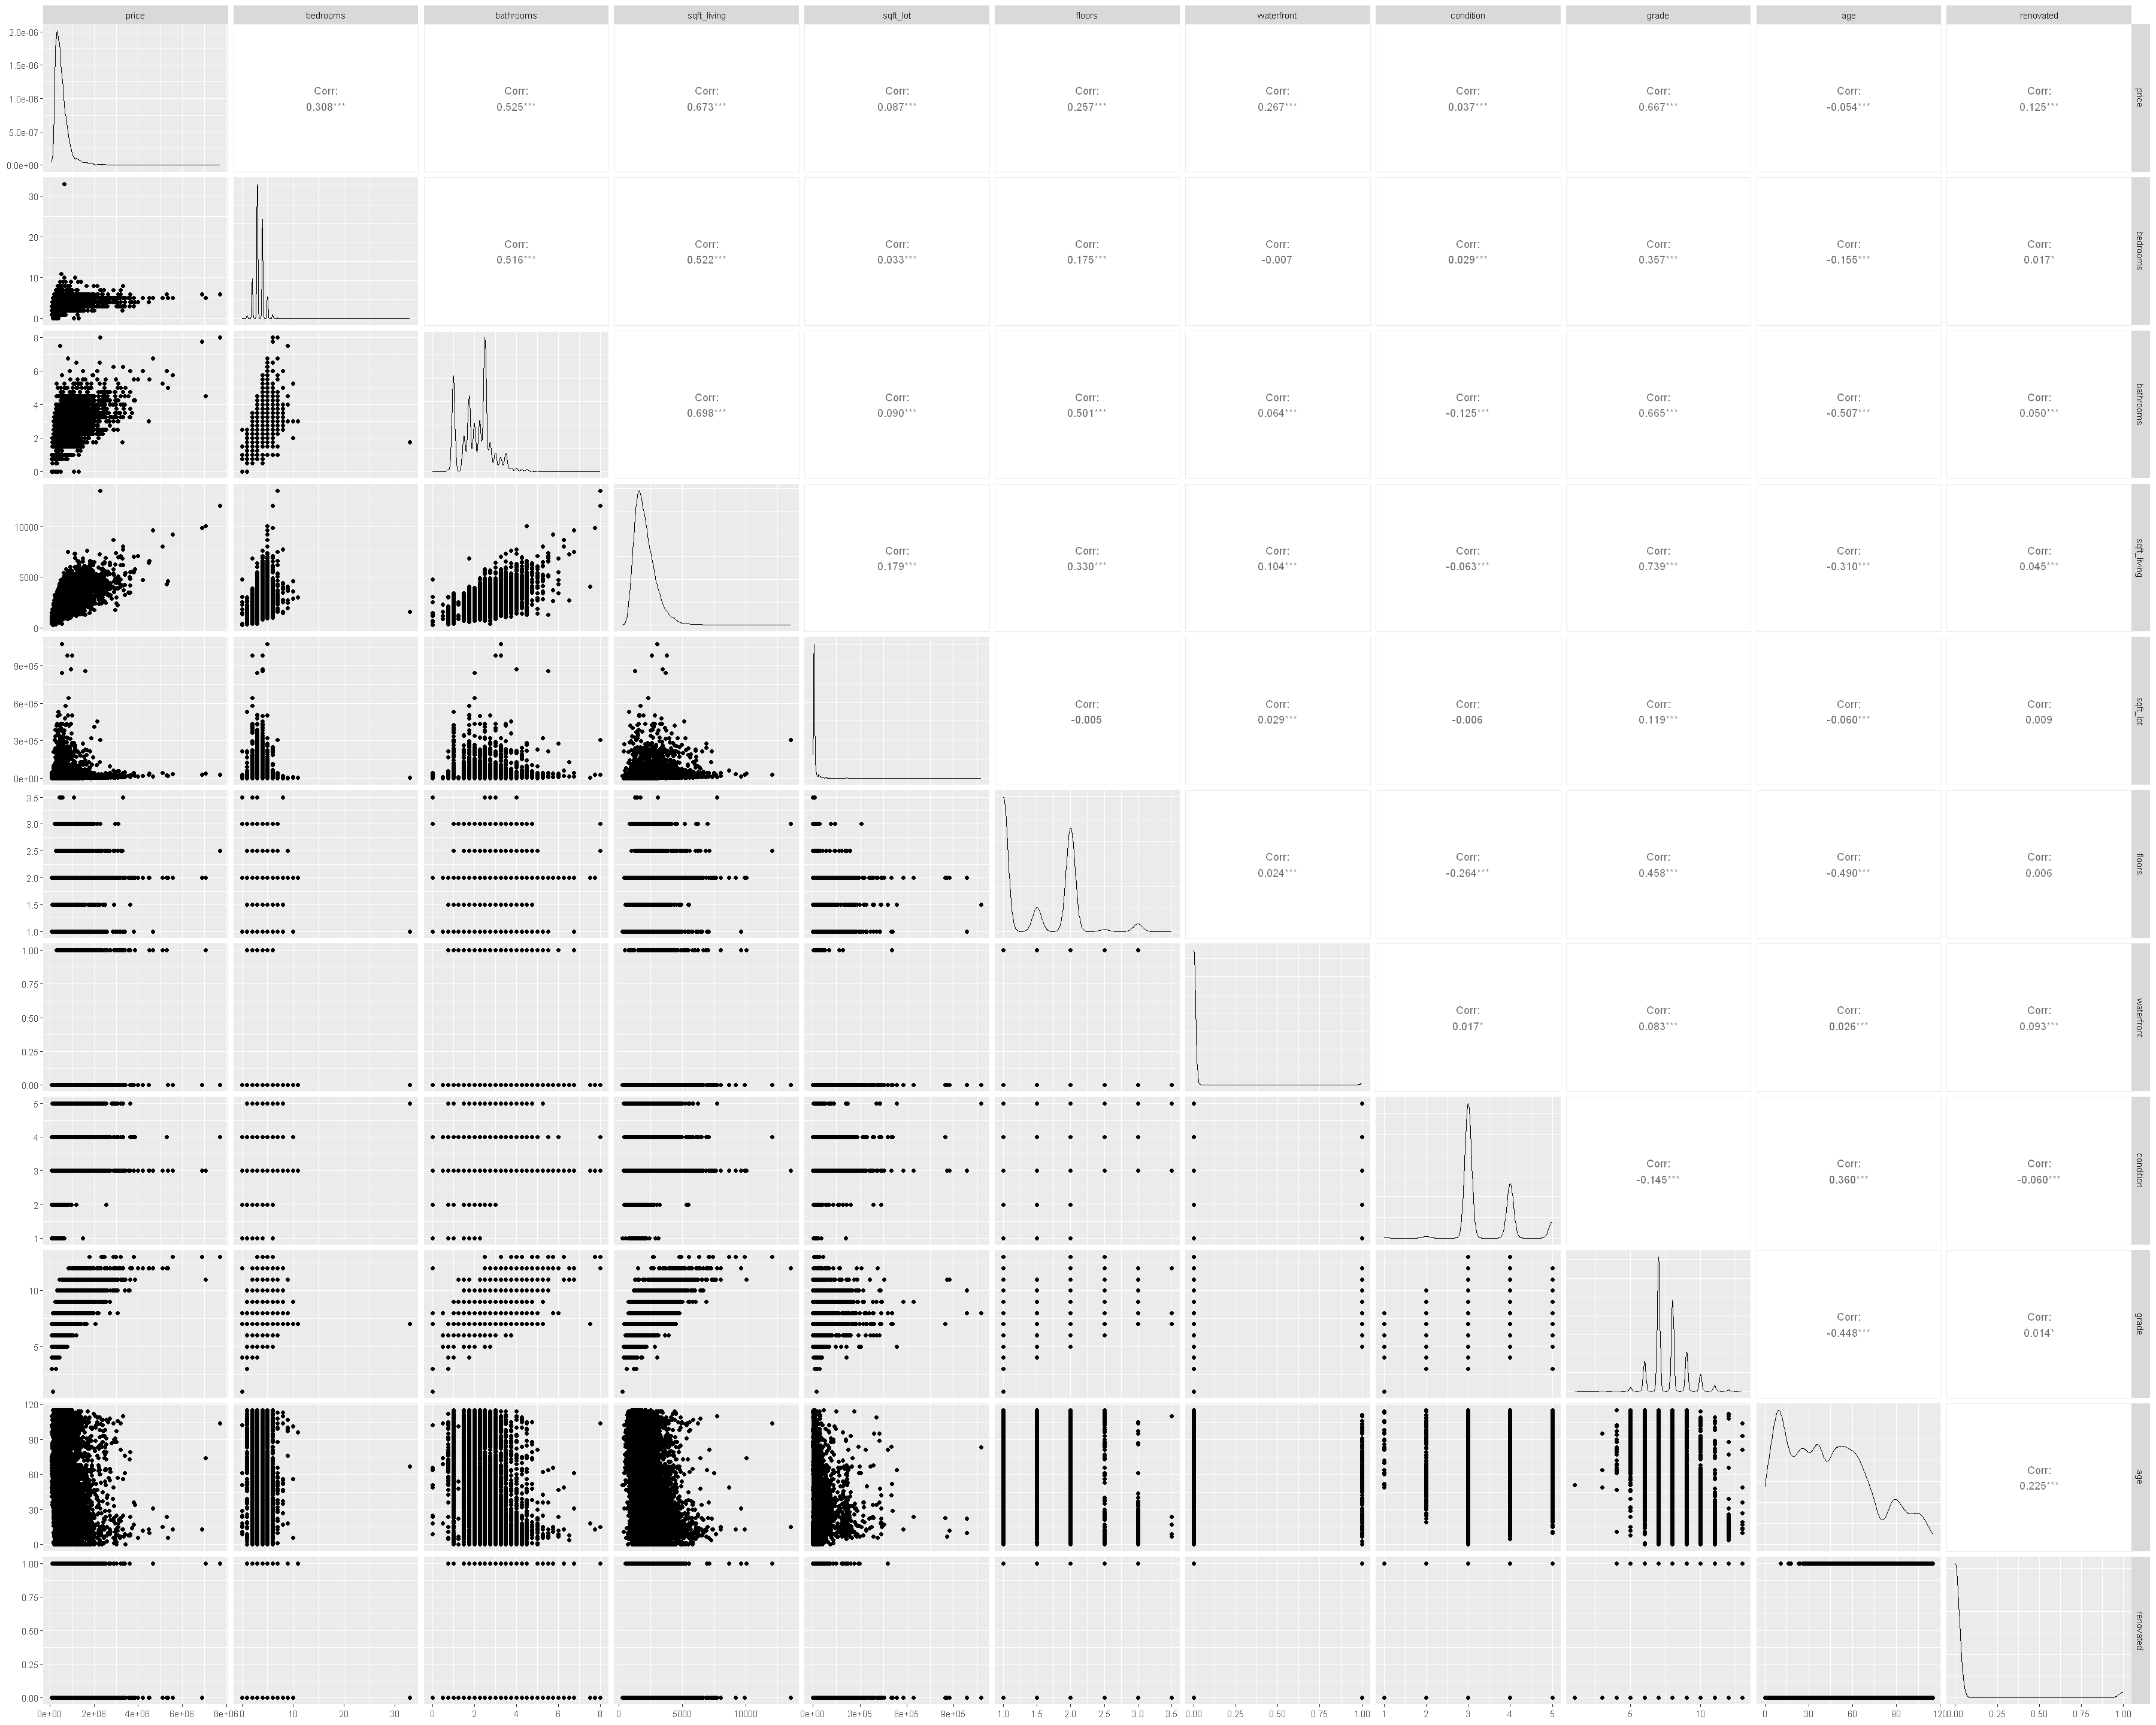

In [7]:
variables=colnames(data)
ggpairs(data, columns= variables)

## HISTOGRAMS

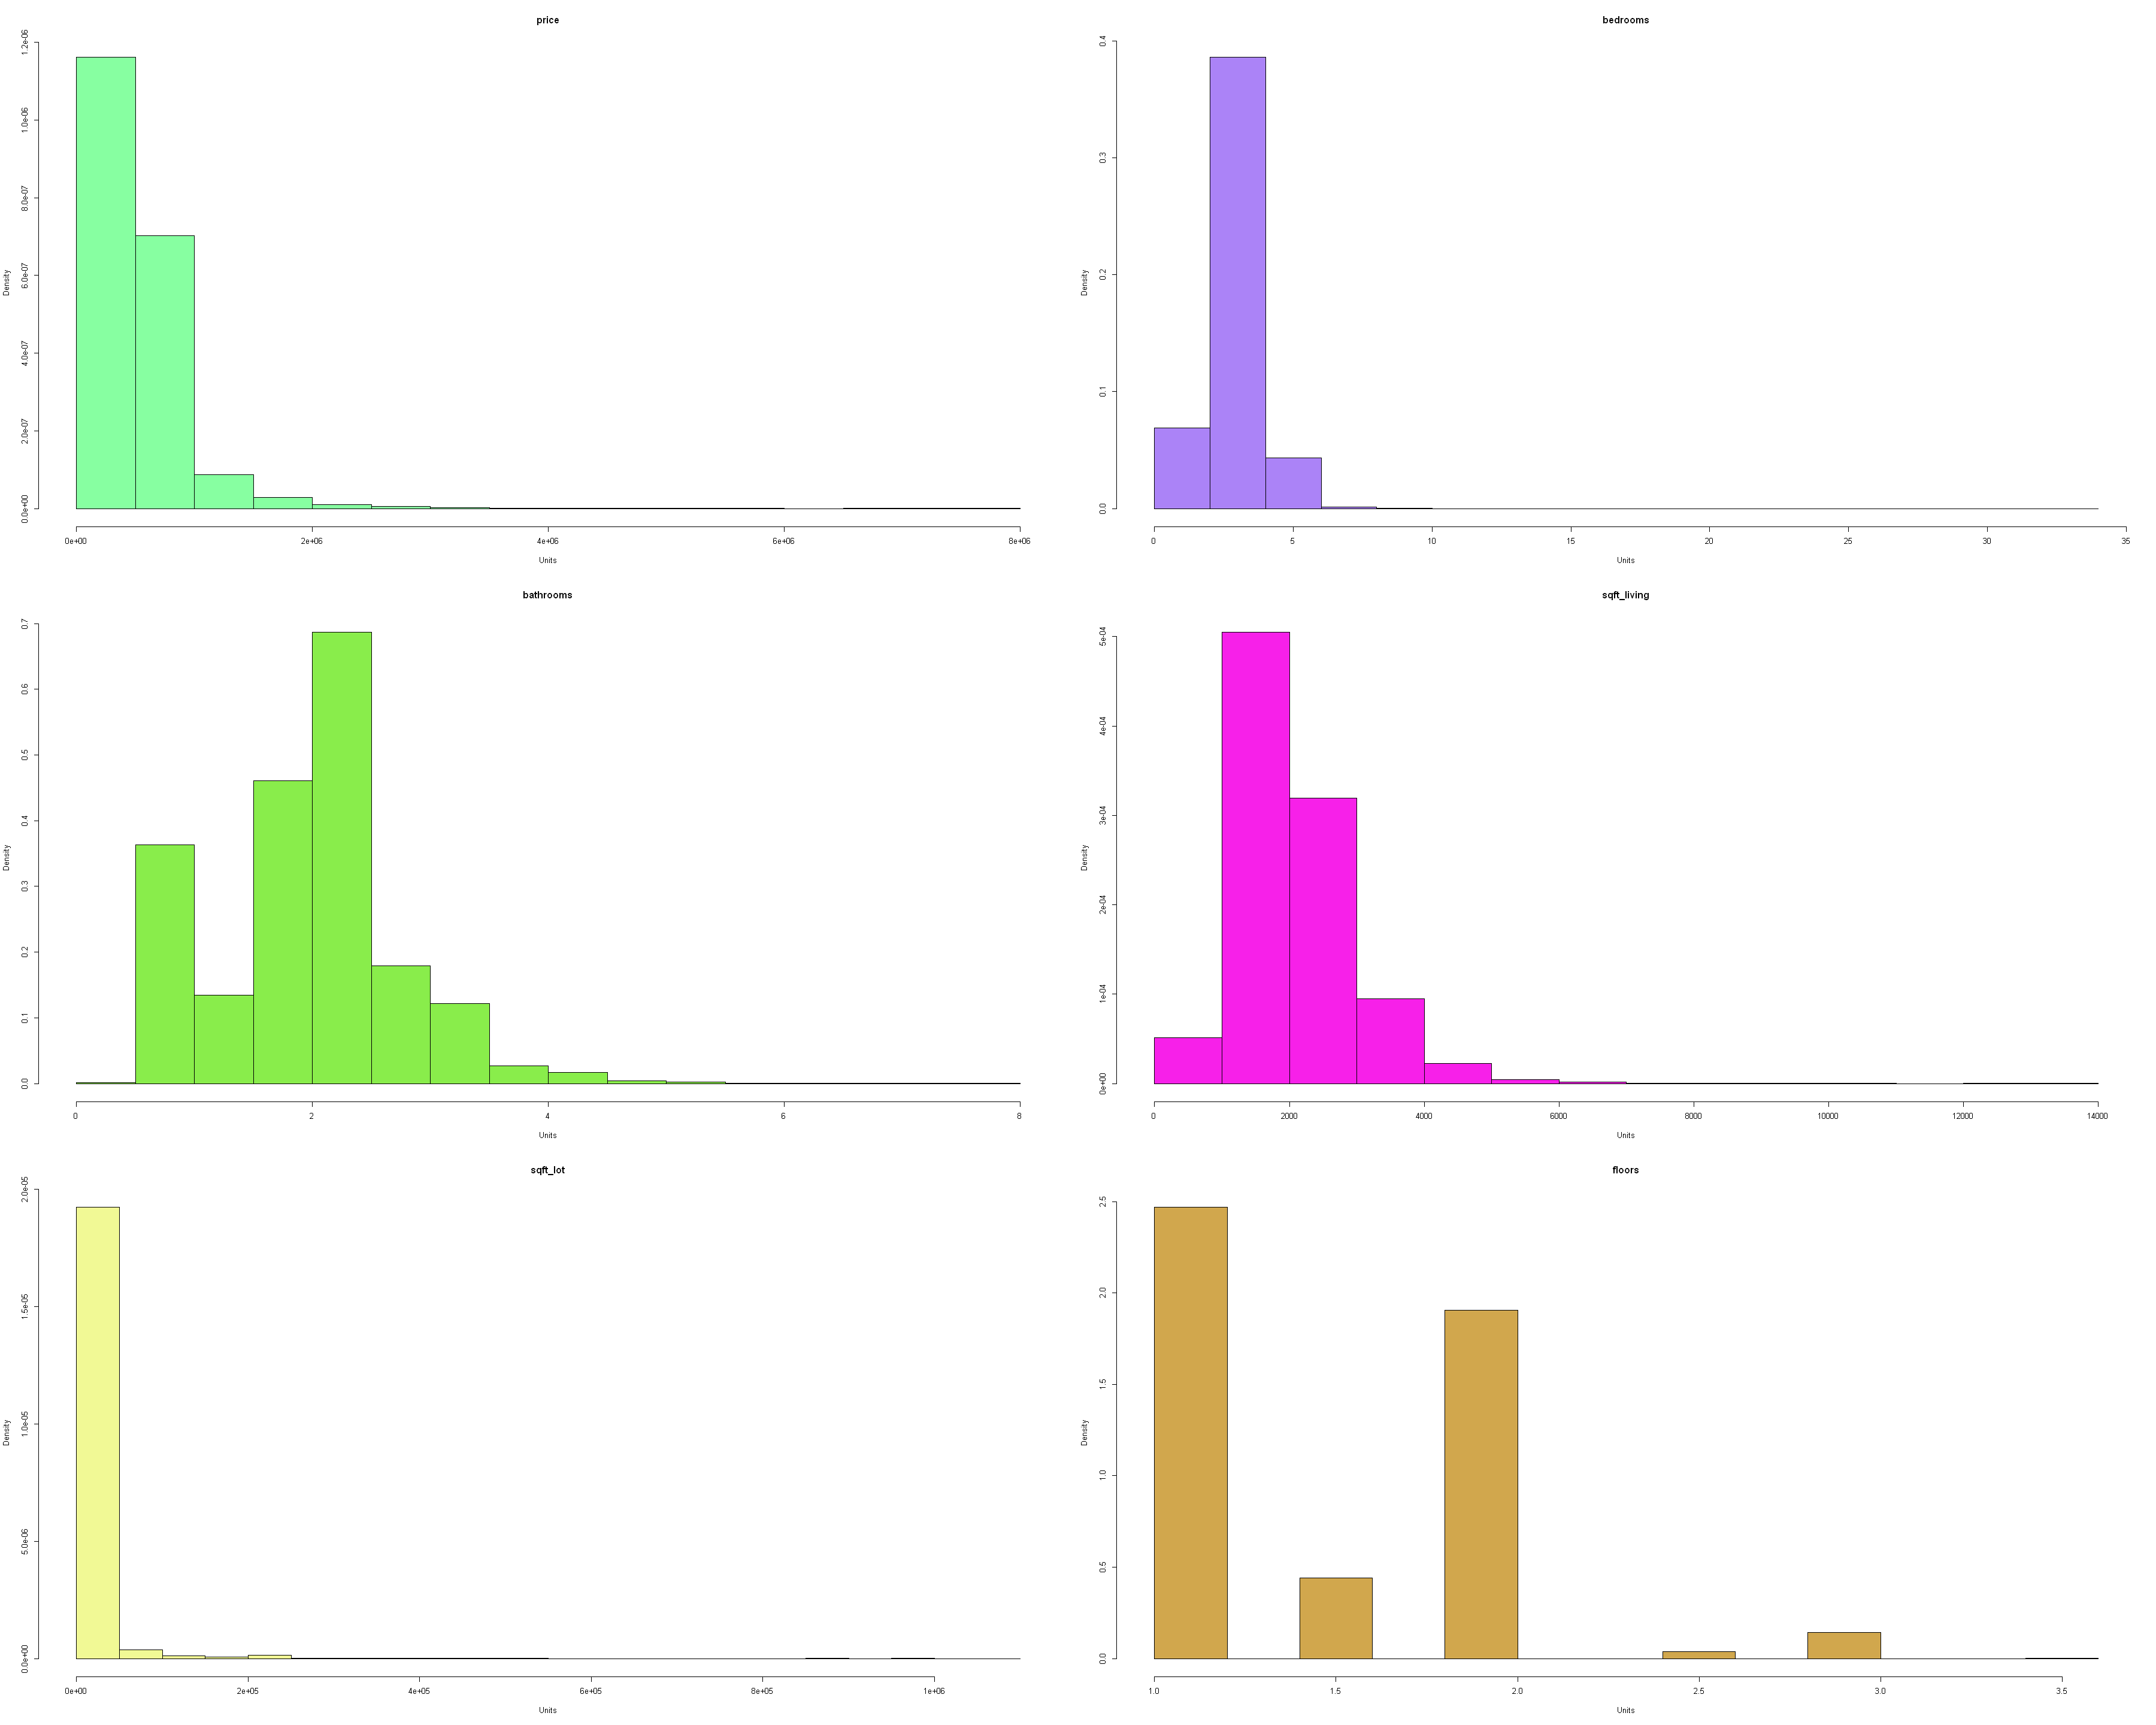

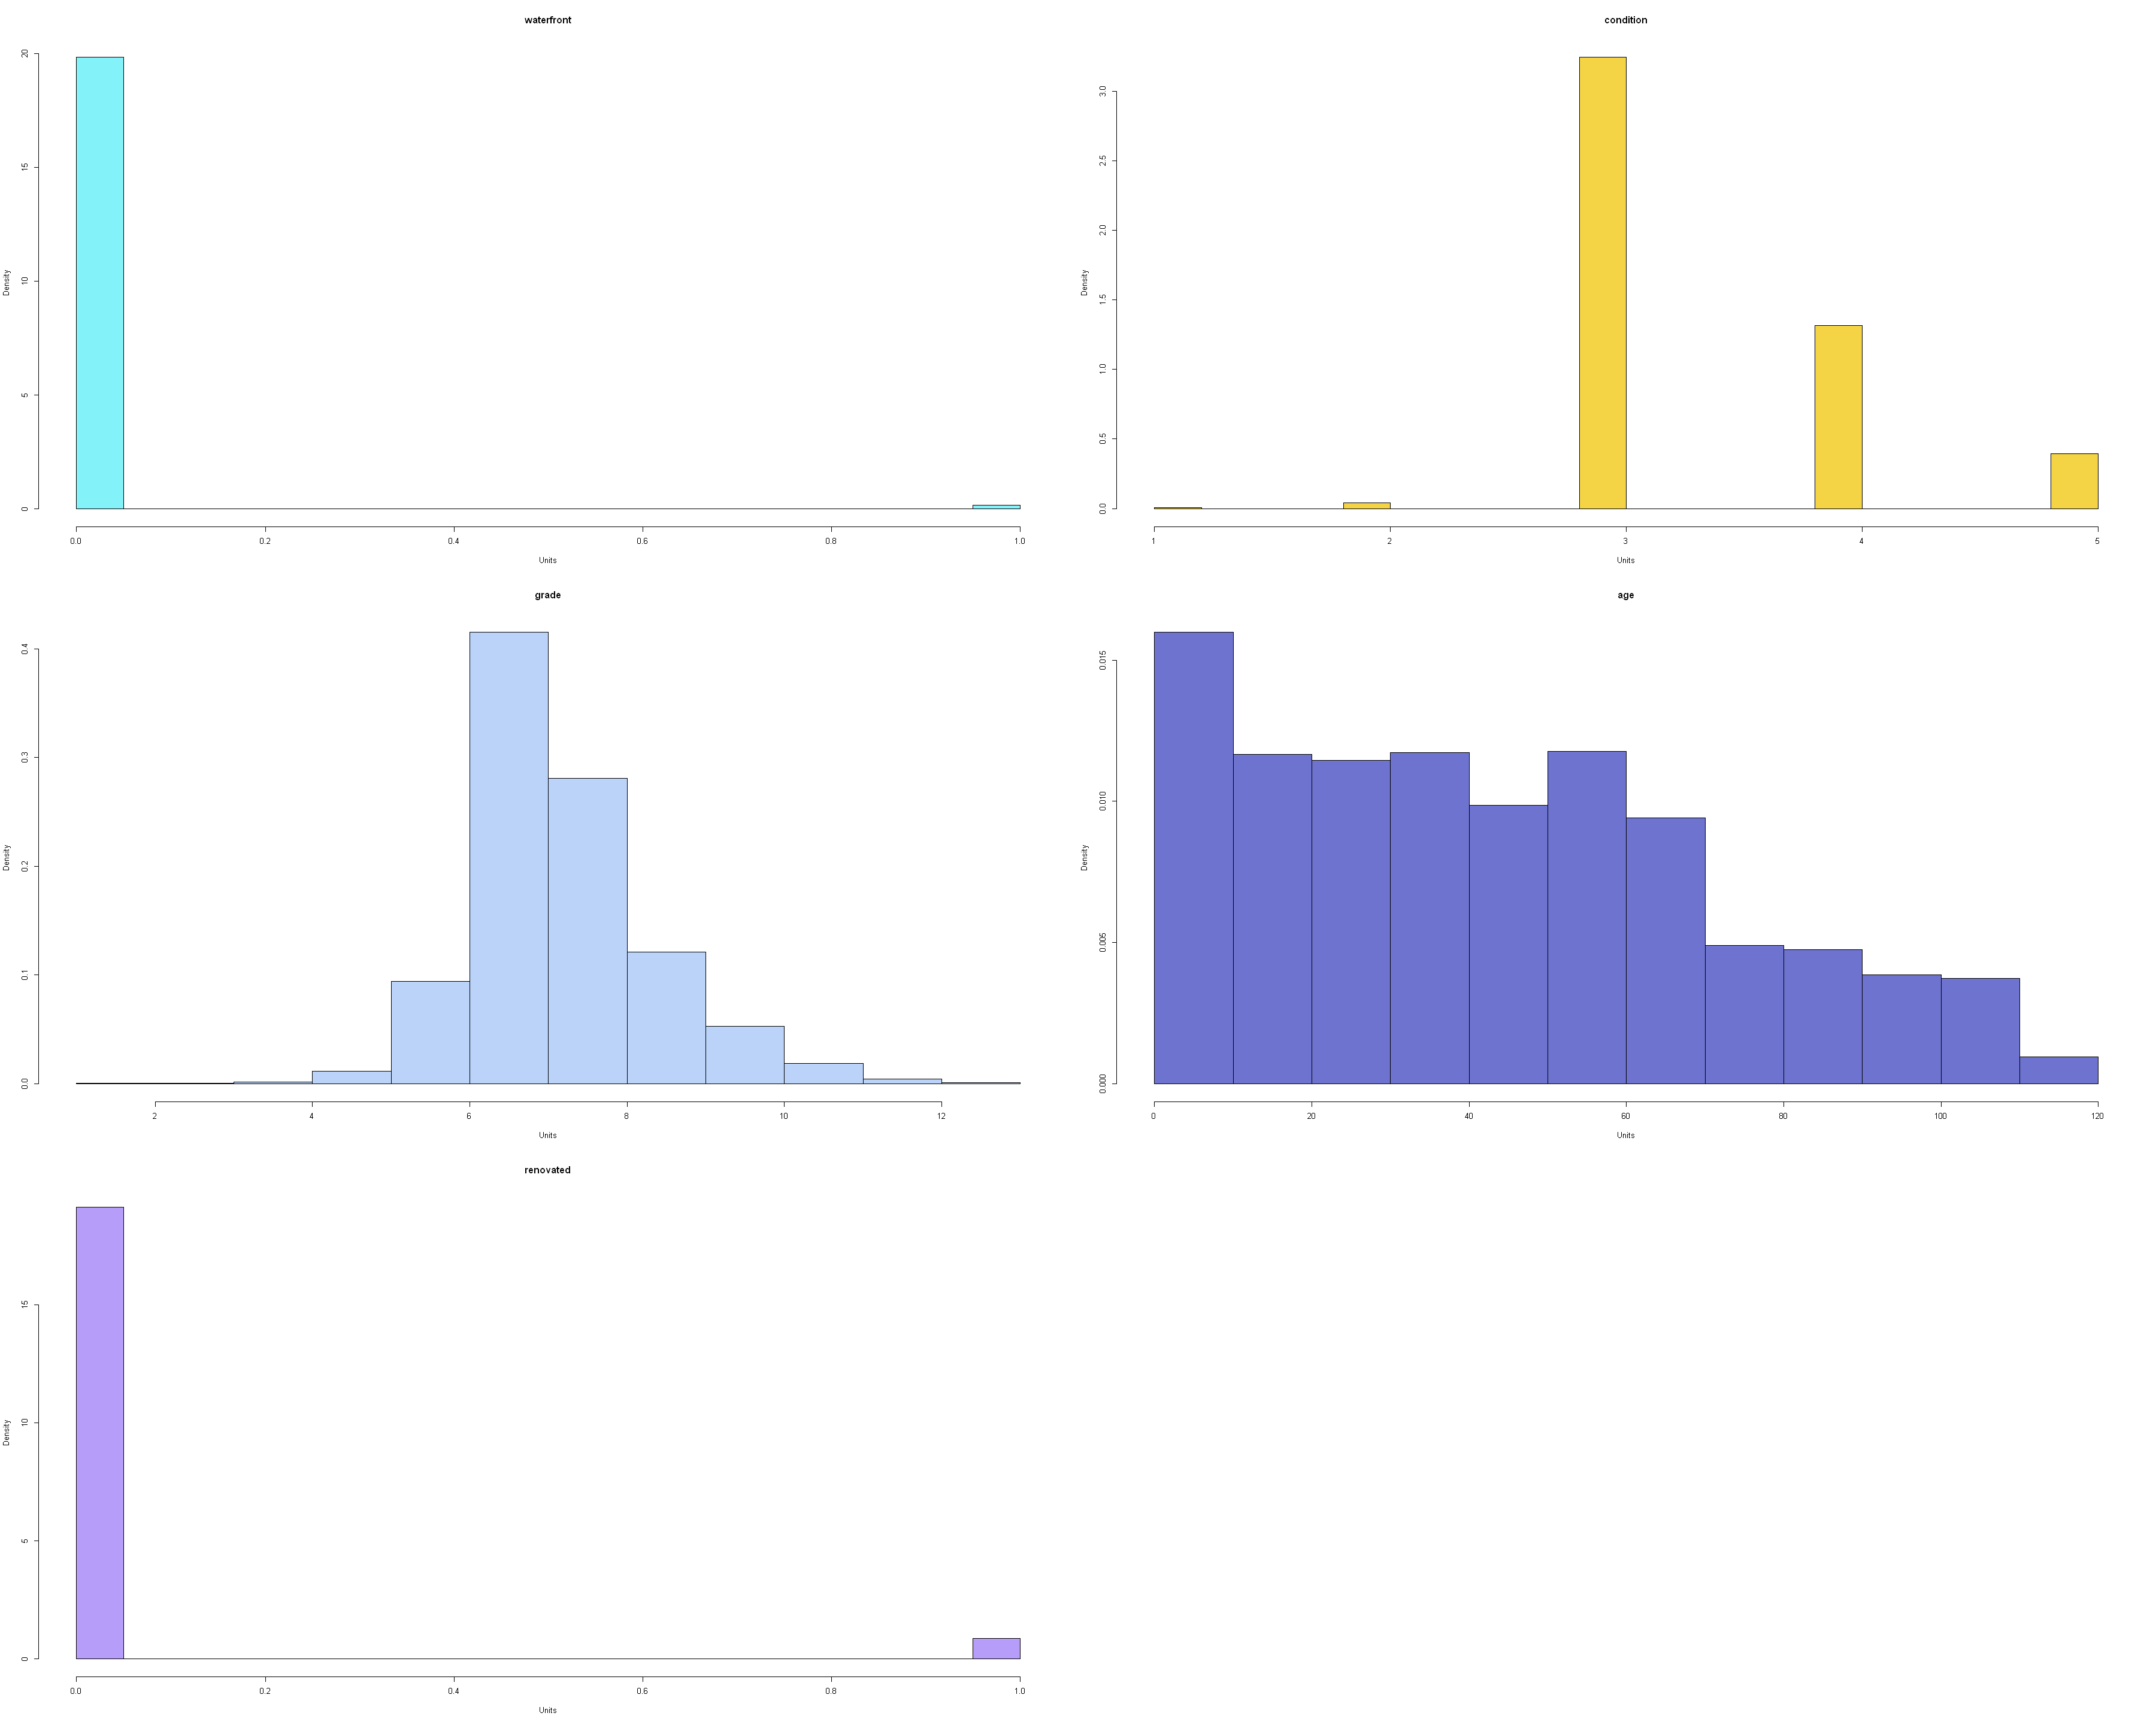

In [8]:
par(mfrow=c(3, 2))
for(var in variables){
    temp <-gsub(",","", data[var]);
    temp <-as.numeric(unlist(data[var]));
    hist(temp,
         main=var,
         col = randomColor(),
         xlab="Units",
         freq = FALSE
            );
}

## BOXPLOTS

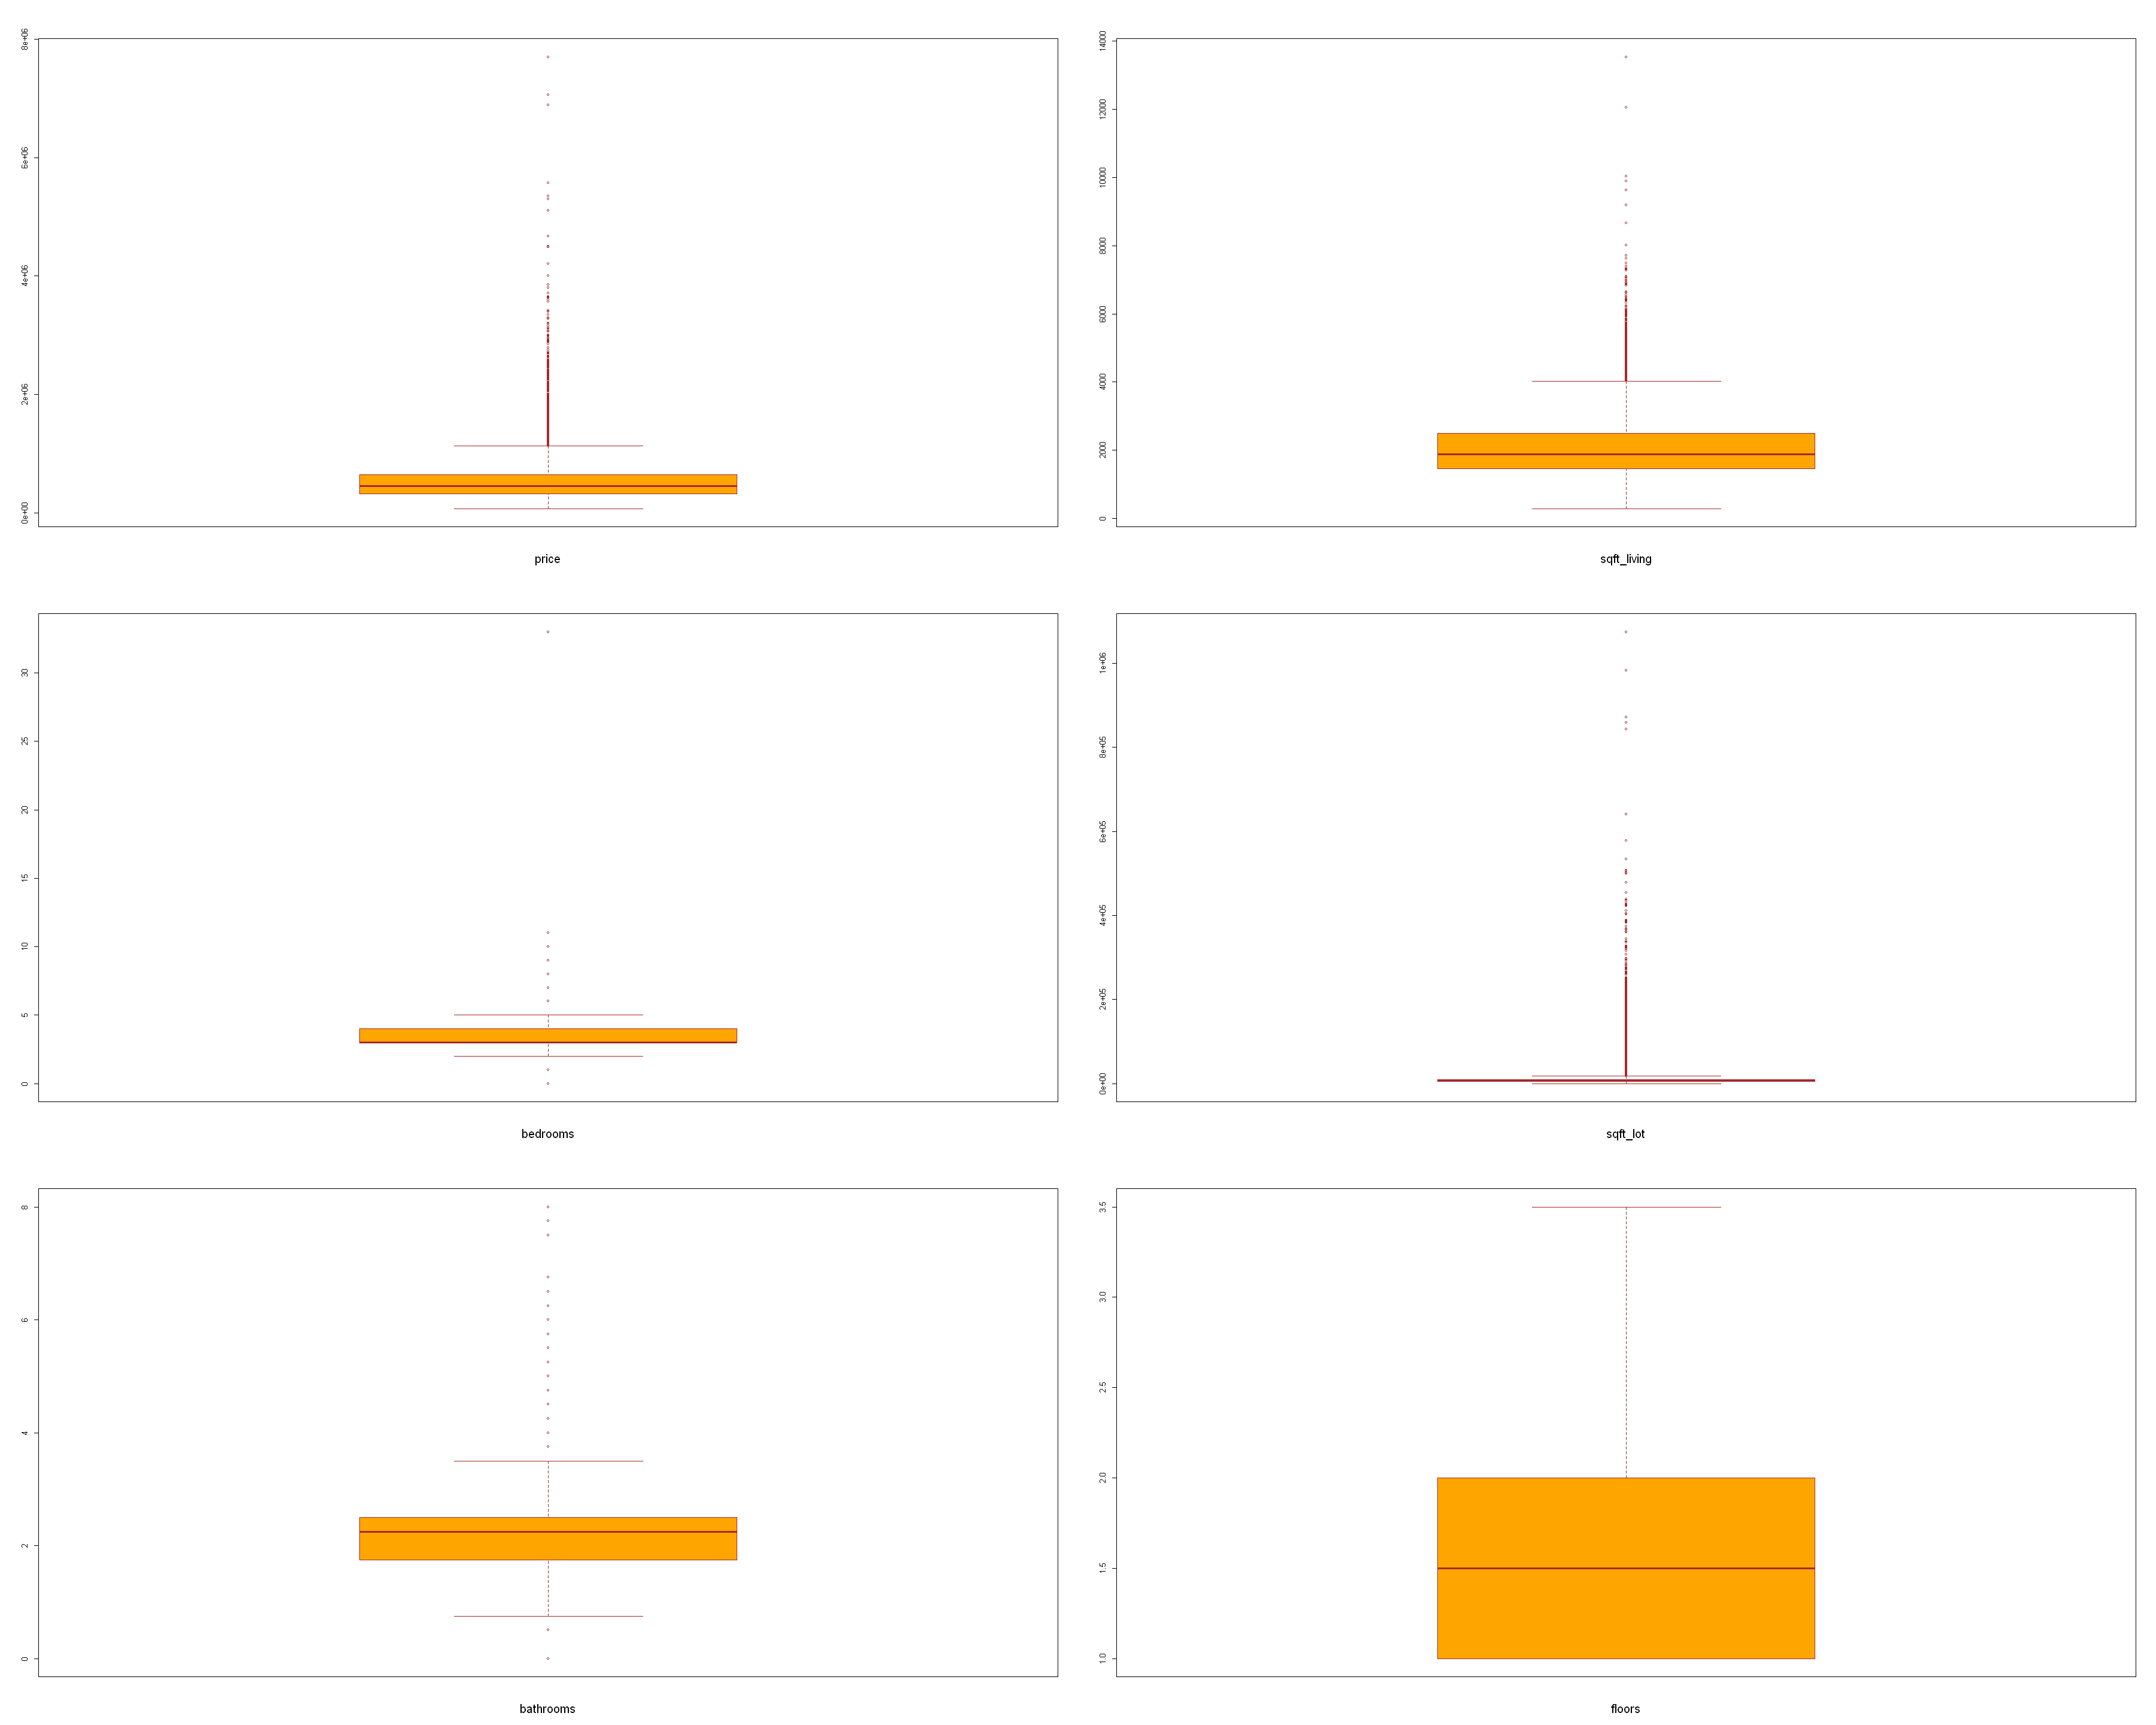

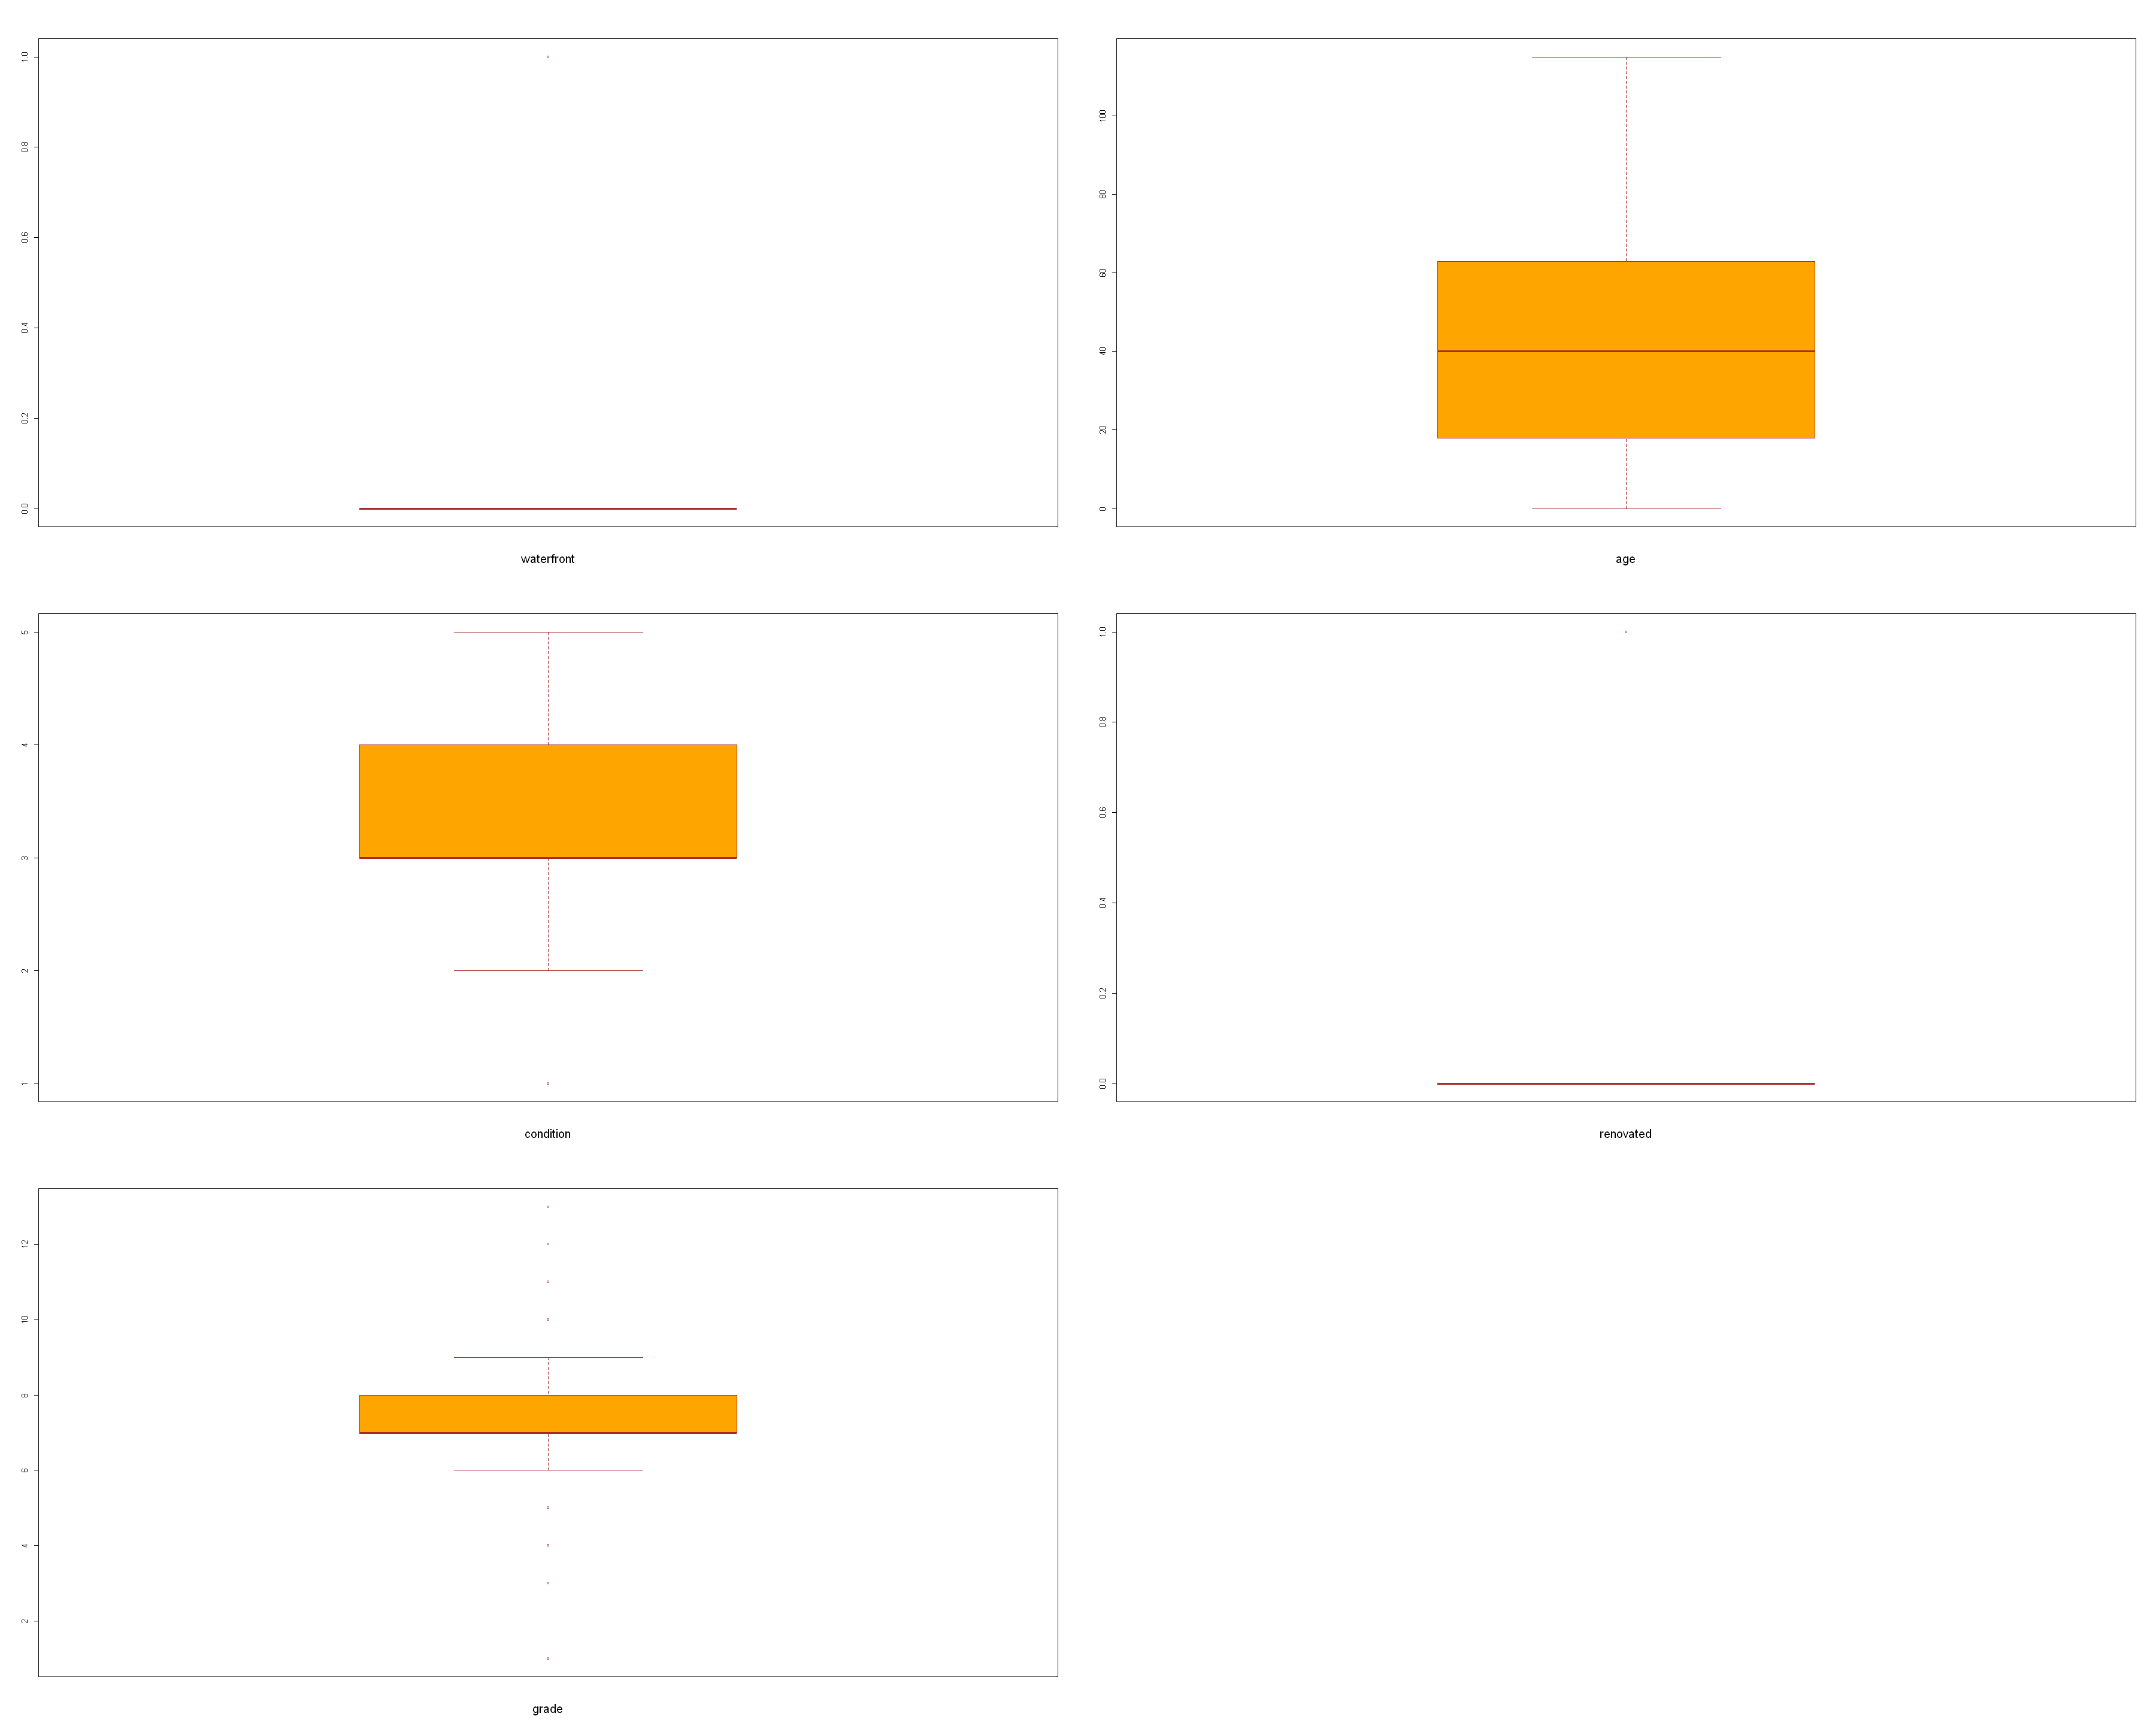

In [9]:
par(mfcol=c(3,2))
for ( i in variables){
boxplot(data[i], 
        col="orange",
        xlab = i,
        cex.lab=1.5,
        border="brown")
   }

# III. FITTING LINEAR REGRESSION MODEL

## SPLIT DATA INTO TRAIN SET AND TEST SET

Dividing the data into Train and Test Data by using random sampling method. 70% of the data will be train dataset and the rest will be test dataset to avoid overfitting. The reason of splitting dataset into two is to avoid overfitting when building prediction model.<br><br>
<b>Overfitting</b> means very good performance on training data and poor performance on test data.

In [10]:
#make this split test reproducible
set.seed(42)
#use 70% of dataset as training set and 30% as test set
split <- sample.split(data,SplitRatio =0.70)
train_df <- subset(data,split==TRUE)
test_df <- subset(data,split==FALSE)

## DETERMINE THE RELATIONSHIP BETWEEN VARIABLES

### By correlation matrix

In [11]:
cor(train_df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,age,renovated
price,1.00000000,0.302545562,0.52465473,0.67237440,0.088906873,0.250684229,0.260336763,0.040765525,0.66567709,-0.04821502,0.129696278
bedrooms,0.30254556,1.000000000,0.49820682,0.50862072,0.033644267,0.164442239,-0.003725269,0.033559608,0.34816311,-0.14178772,0.018802289
bathrooms,0.52465473,0.498206822,1.00000000,0.69796943,0.094822080,0.497412759,0.069861375,-0.124592120,0.66496973,-0.50889327,0.054032689
sqft_living,0.67237440,0.508620724,0.69796943,1.00000000,0.182133822,0.324653526,0.102615120,-0.057899119,0.73873657,-0.30470258,0.053347786
sqft_lot,0.08890687,0.033644267,0.09482208,0.18213382,1.000000000,-0.009111767,0.037262089,-0.006599358,0.11957685,-0.05812977,0.010659873
floors,0.25068423,0.164442239,0.49741276,0.32465353,-0.009111767,1.000000000,0.018319637,-0.258650223,0.45164111,-0.48740259,0.005575449
waterfront,0.26033676,-0.003725269,0.06986137,0.10261512,0.037262089,0.018319637,1.000000000,0.021988034,0.08619280,0.03128143,0.102278884
condition,0.04076553,0.033559608,-0.12459212,-0.05789912,-0.006599358,-0.258650223,0.021988034,1.000000000,-0.13942909,0.35909826,-0.052334682
grade,0.66567709,0.348163112,0.66496973,0.73873657,0.119576845,0.451641114,0.086192798,-0.139429093,1.00000000,-0.44280188,0.023309468
age,-0.04821502,-0.141787718,-0.50889327,-0.30470258,-0.058129767,-0.487402588,0.031281431,0.359098258,-0.44280188,1.00000000,0.214315136


### By corrplot

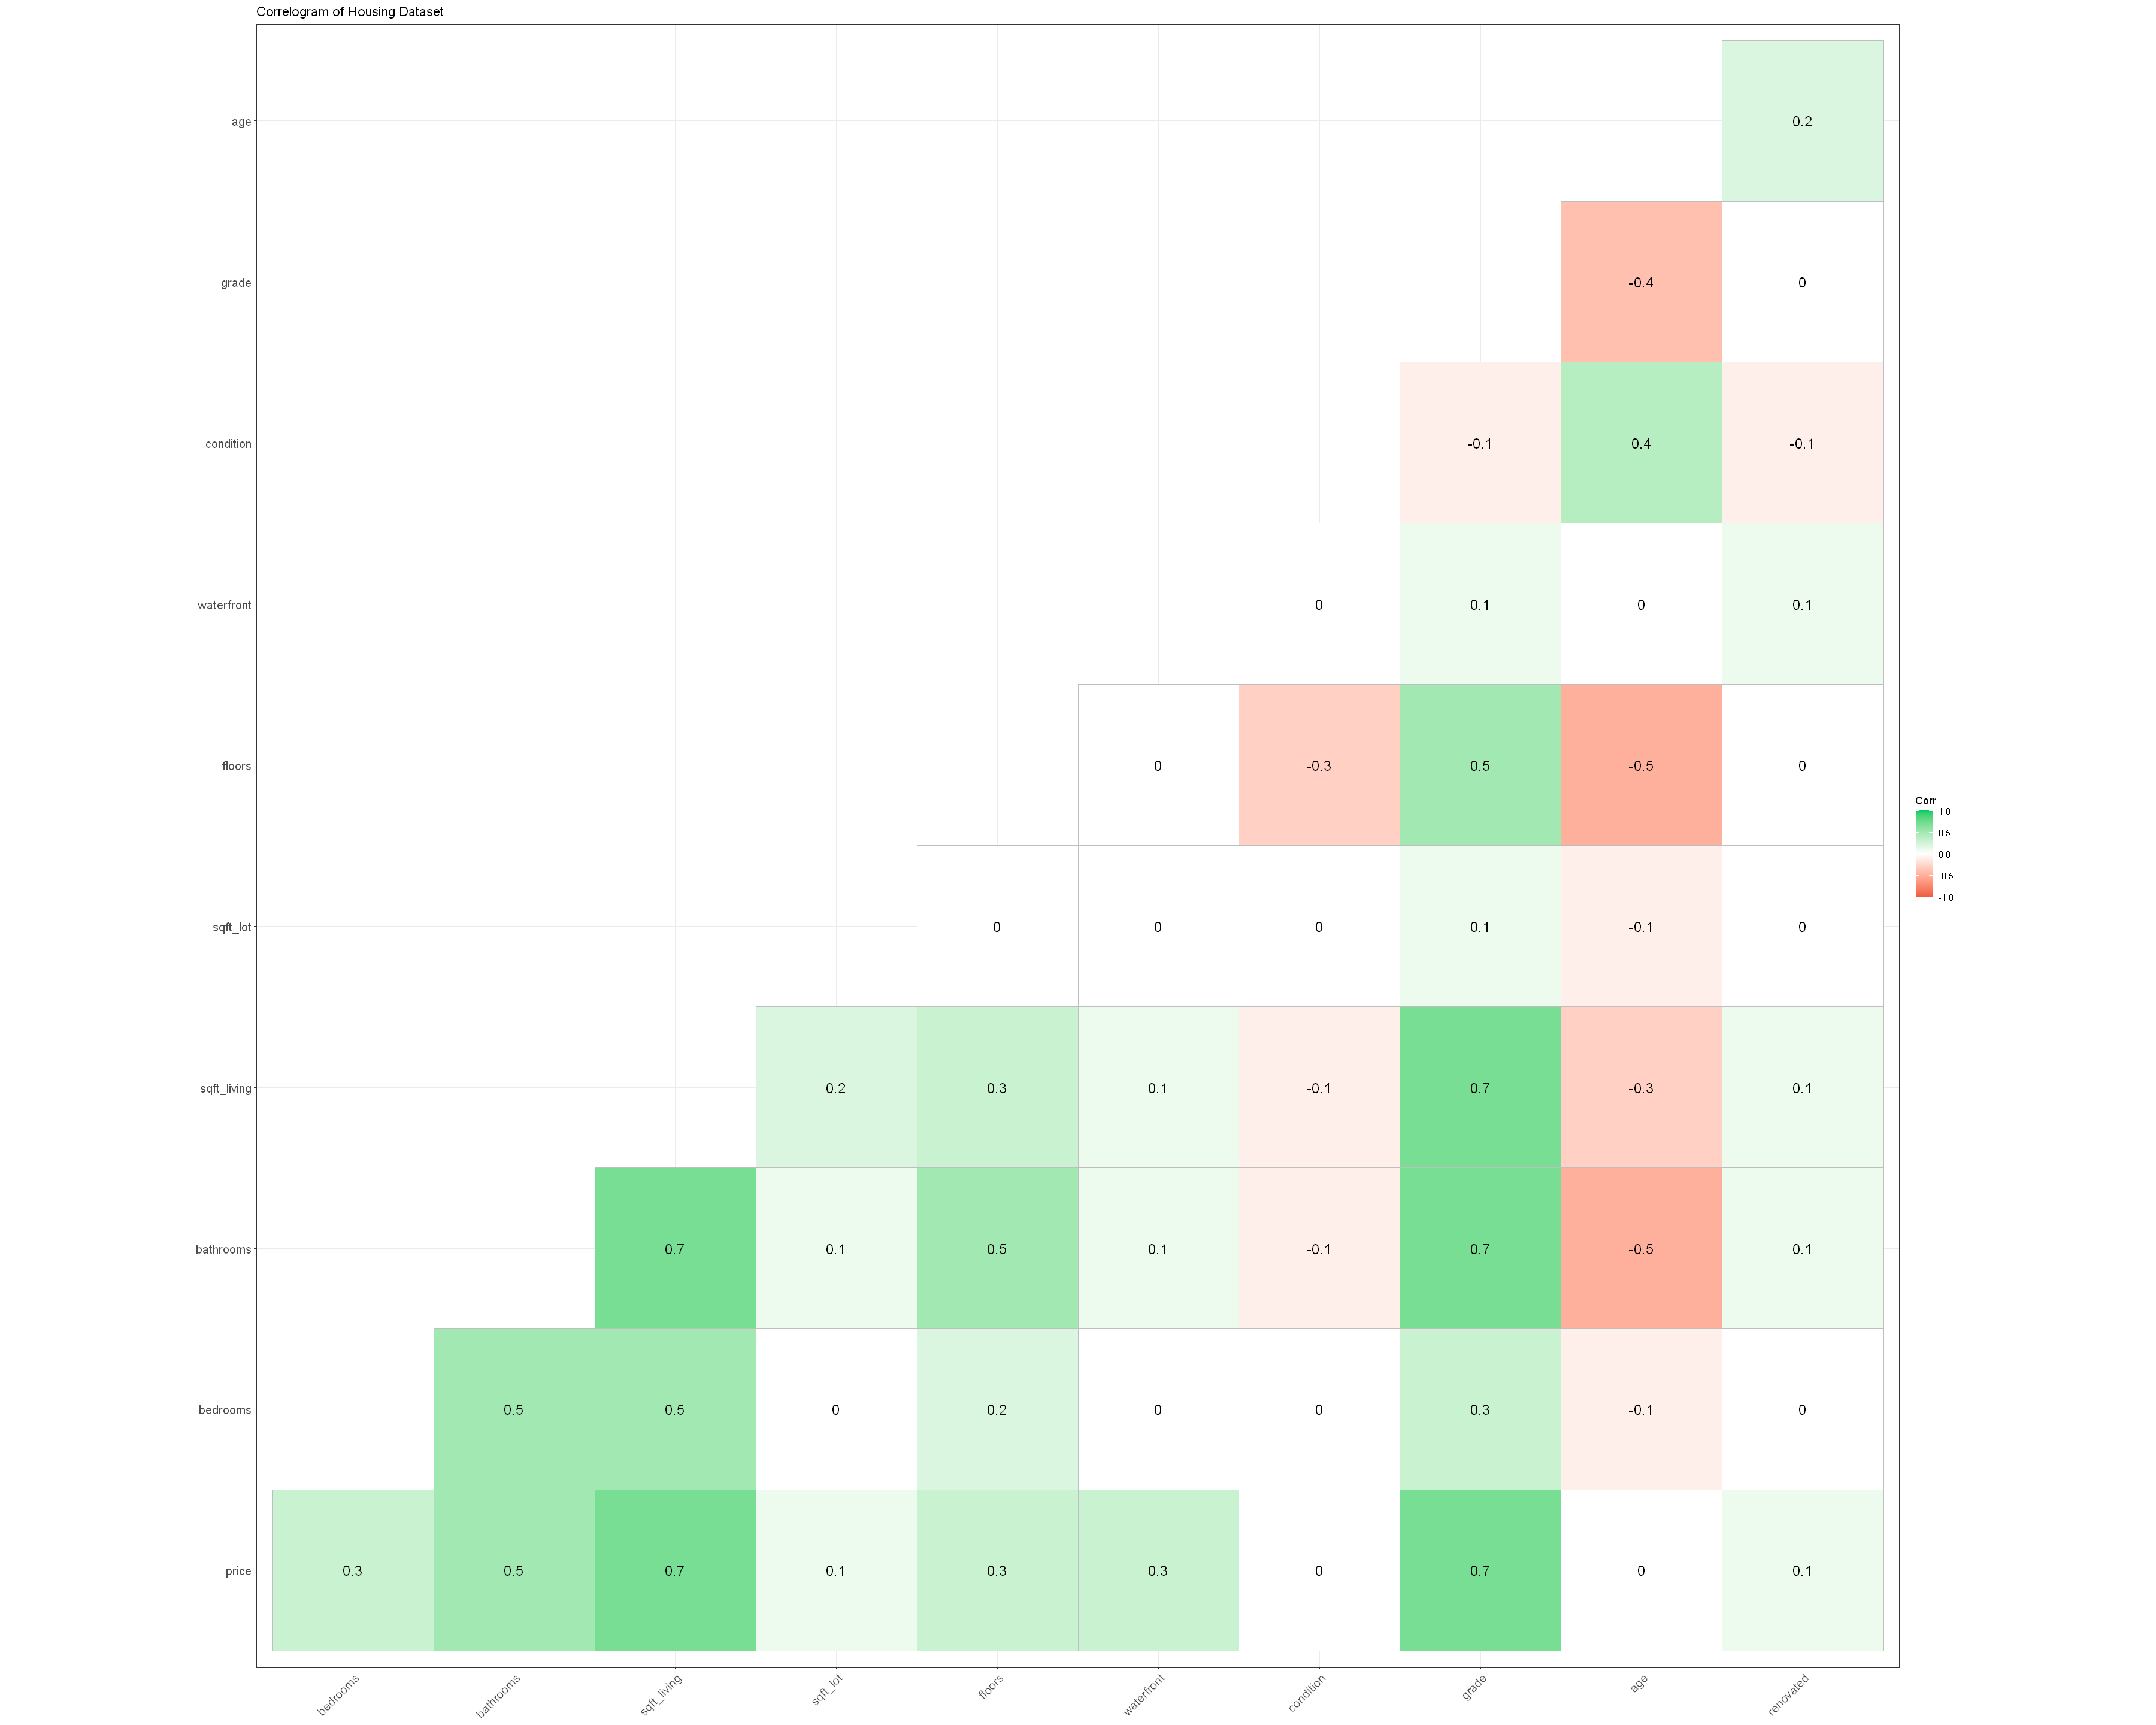

In [12]:
corr <- round(cor(train_df), 1)
ggcorrplot(corr,
           type = "lower",
           lab = TRUE, 
           lab_size = 5,  
           colors = c("tomato2", "white", "springgreen3"),
           title="Correlogram of Housing Dataset", 
           ggtheme=theme_bw)

According to our corrplot, house price is positively correlated with bedrooms, bathrooms, sqft_living and grade.

### Some scatter plots between some positive-correlated quantitative variables

`geom_smooth()` using formula = 'y ~ x'


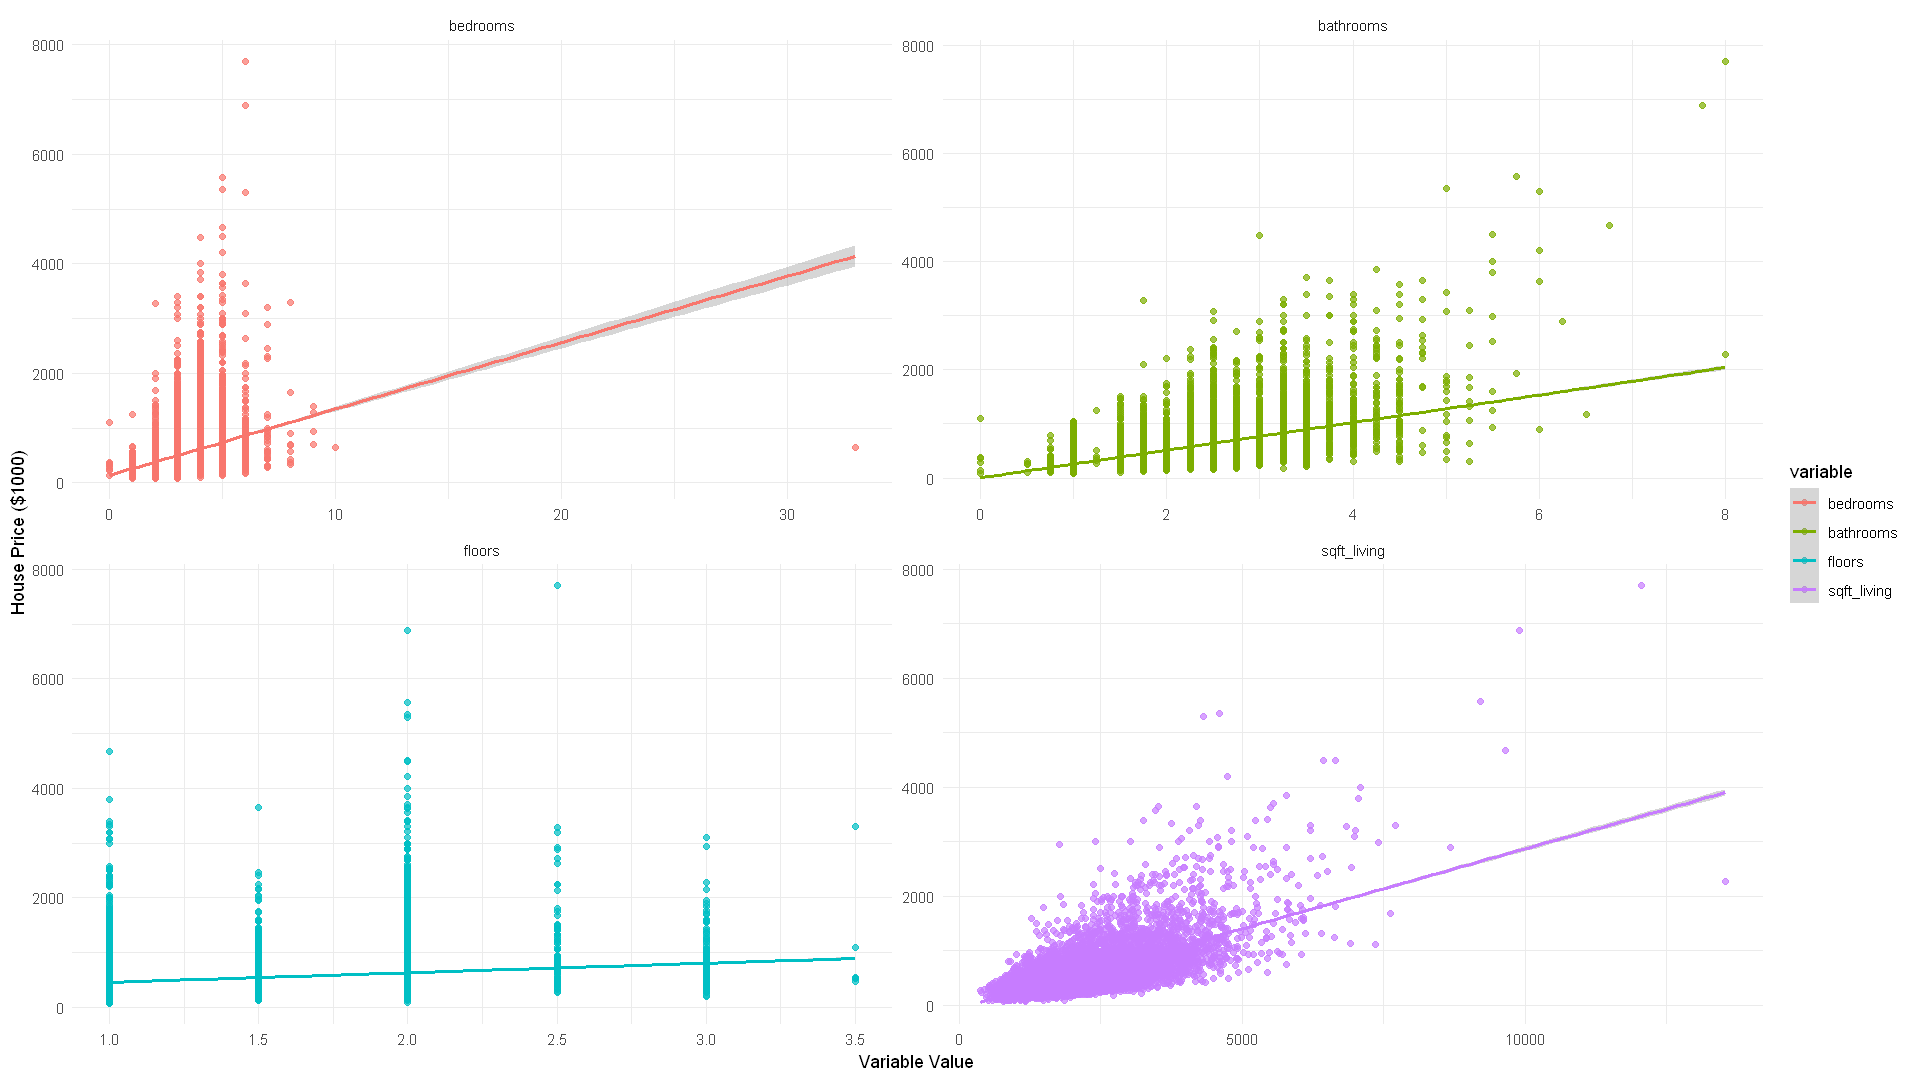

In [13]:
options(repr.plot.width=16, repr.plot.height=9)
train_df %>%
  dplyr::select(c(price, bedrooms, bathrooms,floors, sqft_living)) %>%
  melt(id.vars = "price") %>%
  ggplot(aes(x = value, y = price/1000, colour = variable)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method="lm")+
  facet_wrap(~variable, scales = "free", ncol = 2) +
  labs(x = "Variable Value", y = "House Price ($1000)") +
  theme_minimal()

From these scatter plots, we can say that the relationship between price (dependent variable) and bathrooms or sqft_living (independent variables) are linear and in the positive direction.<br> However, the relationship between price and bedrooms or floors is not clearly linear.

### Boxplots for categorical variables

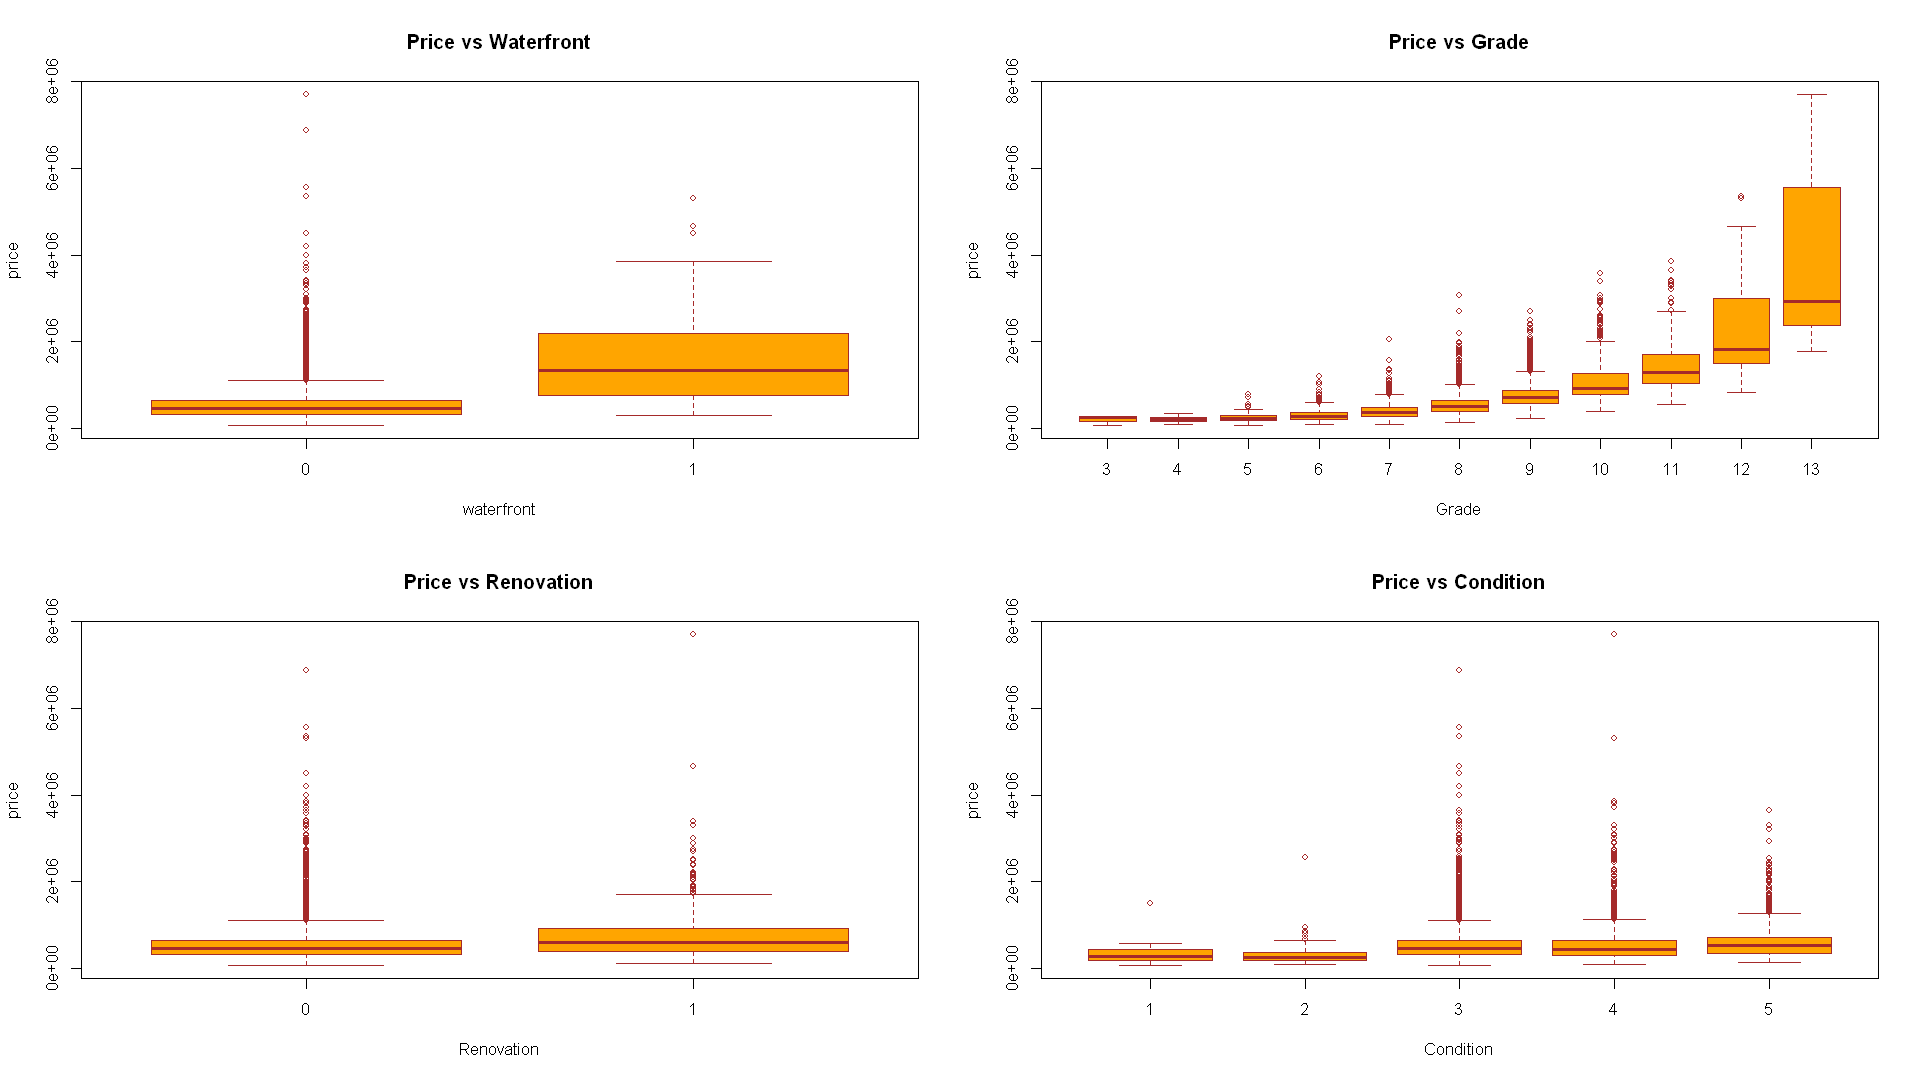

In [14]:
par(mfrow=c(2, 2))
boxplot(price~waterfront,data=train_df,main="Price vs Waterfront", xlab="waterfront",ylab="price",col="orange",border="brown")
boxplot(price~grade,data=train_df,main="Price vs Grade", xlab="Grade",ylab="price",col="orange",border="brown")
boxplot(price~renovated,data=train_df,main="Price vs Renovation", xlab="Renovation",ylab="price",col="orange",border="brown")
boxplot(price~condition,data=train_df,main="Price vs Condition", xlab="Condition",ylab="price",col="orange",border="brown")

From the boxplots, we can see that there are lots of outliers in the original data.<br>
Now we will decide whether or not should we eliminate outliners to build the regression model.

In [15]:
no_outliers_df = train_df[-which(train_df$price %in% boxplot(train_df$price,plot=FALSE)$out),]

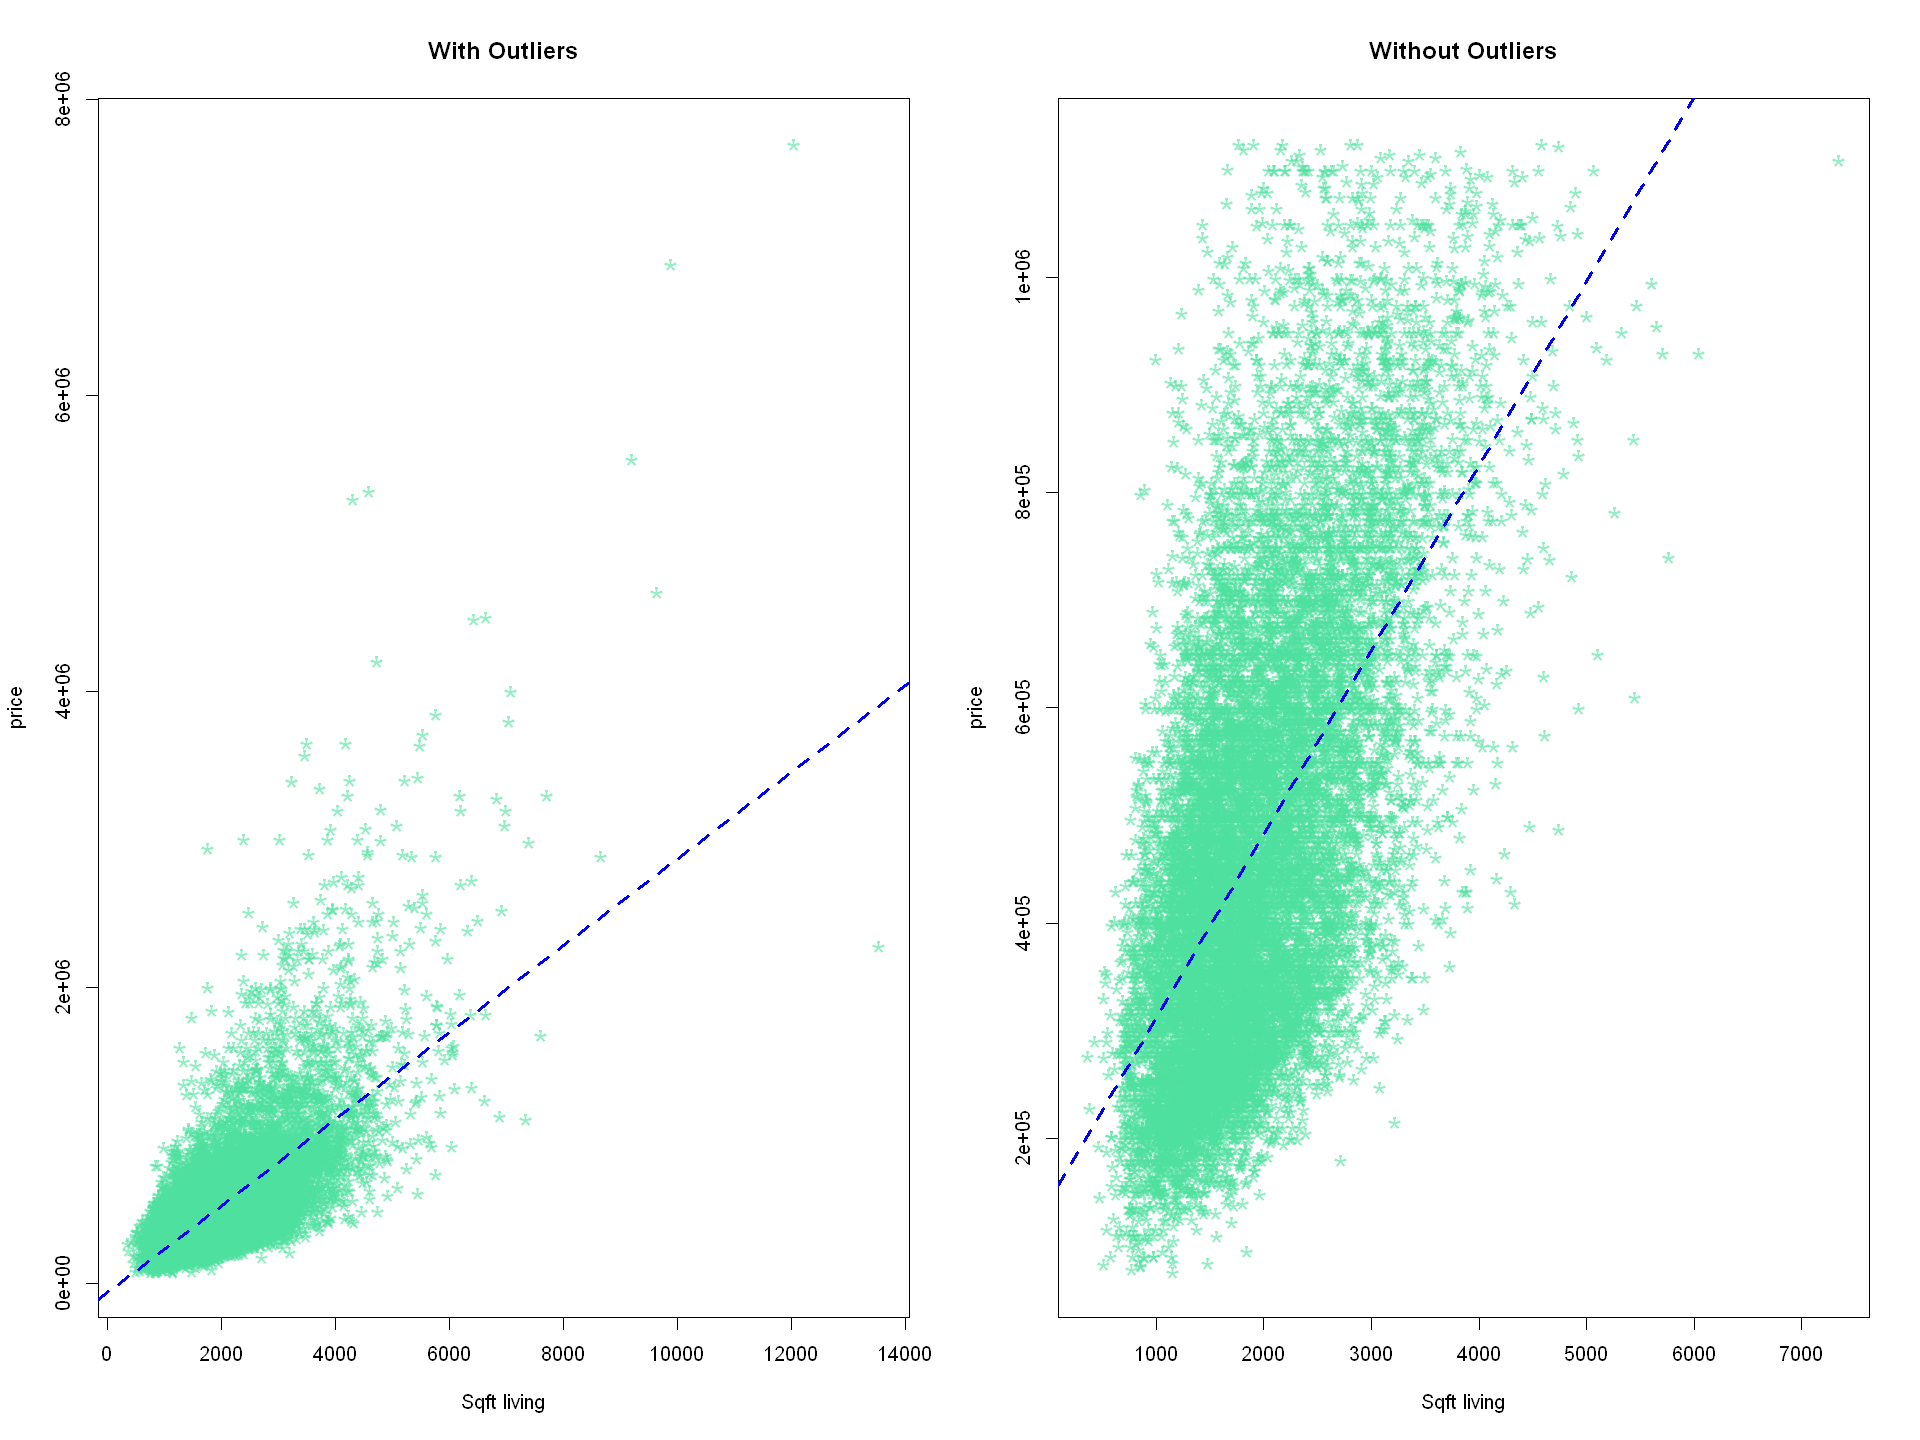

In [16]:
par(mfrow=c(1, 2))
options(repr.plot.width=16, repr.plot.height=12)
 
tmp = randomColor()
plot(train_df$sqft_living, train_df$price, main="With Outliers", xlab="Sqft living", ylab="price", pch="*", col=alpha(tmp,0.6), cex=2)
abline(lm(price ~ sqft_living, data=train_df), col="blue", lwd=3, lty=2)
plot(no_outliers_df$sqft_living, no_outliers_df$price, main="Without Outliers", xlab="Sqft living", ylab="price", pch="*", col=alpha(tmp,0.6), cex=2)
abline(lm(price ~ sqft_living, data=no_outliers_df), col="blue", lwd=3, lty=2)

Note that the slope increases wildly of the line of best fit after removing the outliers.<br>
Clearly, removing outliers to train the model will result in exaggerated predictions (large errors) for large values due to large gradients.<br> So we continue to use the full data.

## ANALYSIS  OF VARIANCE (ANOVA): ONE-WAY ANOVA

### Price vs Condition

In [17]:
#Overview
train_df %>% 
  group_by(condition) %>% 
  summarise(condition_freq = n(), 
            price_mean = mean(price, na.rm = TRUE), 
            price_sd = sd(price, na.rm = TRUE))

condition,condition_freq,price_mean,price_sd
<int>,<int>,<dbl>,<dbl>
1,19,355447.4,314246.5
2,115,319481.8,267178.0
3,8966,542146.4,369539.6
4,3563,530849.6,380909.5
5,1078,609828.7,407442.3


Hypothesis:<br>
<ul>
    <li>H0: The mean price is equal for all levels of <b>condition</b>.</li>
    <li>H1: At least one of the <b>condition</b> level has a mean <b>price</b> that is not the same as the other <b>condition</b> level.</li>
</ul>

In [18]:
one_way <- aov(price ~ as.factor(condition), data = train_df)
summary(one_way)

                        Df    Sum Sq   Mean Sq F value Pr(>F)    
as.factor(condition)     4 1.176e+13 2.939e+12   20.92 <2e-16 ***
Residuals            13736 1.930e+15 1.405e+11                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The p-value of the <b>condition</b> variable is low (p < 0.001, indicated by the ’***’), which implies that rate of <b>condition</b> gives impact on the house sold price. Hence the H0 is rejected. There is a significant difference in the average price of house based on the <b>condition</b> of house.

### Tukey HSD Test 

In [19]:
TukeyHSD(one_way)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = price ~ as.factor(condition), data = train_df)

$`as.factor(condition)`
         diff        lwr        upr     p adj
2-1 -35965.53 -289196.48 217265.410 0.9952365
3-1 186699.07  -48141.42 421539.552 0.1916188
4-1 175402.27  -59814.44 410618.981 0.2495274
5-1 254381.32   17730.93 491031.710 0.0278314
3-2 222664.60  126700.53 318628.668 0.0000000
4-2 211367.80  114486.69 308248.917 0.0000000
5-2 290346.85  190035.05 390658.651 0.0000000
4-3 -11296.80  -31547.54   8953.948 0.5481547
5-3  67682.25   34718.65 100645.856 0.0000002
5-4  78979.05   43434.04 114524.055 0.0000000


\- According to the results, there are statistically significant differences (p < 0.05) between <b>condition</b> groups 5-1 (5 and 1), 3-2, 4-2, 5-2, 5-3 and 5-4.<br> - The difference between <b>condition</b> groups 2-1, 3-1, 4-1 and 4-3 are not statistically significant.

### Price vs Grade

In [20]:
#Overview
train_df %>% 
  group_by(grade) %>% 
  summarise(grade_freq = n(), 
            price_mean = mean(price, na.rm = TRUE), 
            price_sd = sd(price, na.rm = TRUE))

grade,grade_freq,price_mean,price_sd
<int>,<int>,<dbl>,<dbl>
3,3,205666.7,113517.99
4,18,208669.4,84432.37
5,144,249605.7,127631.97
6,1242,302694.8,127277.41
7,5779,401798.3,155038.13
8,3863,545125.1,220218.48
9,1647,770872.7,319219.11
10,731,1094426.9,499681.41
11,247,1500346.7,672099.75


In [21]:
one_way <- aov(price ~ as.factor(grade), data = train_df)
summary(one_way)

                    Df    Sum Sq   Mean Sq F value Pr(>F)    
as.factor(grade)    10 1.019e+15 1.019e+14    1518 <2e-16 ***
Residuals        13730 9.221e+14 6.716e+10                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The p-value of the <b>grade</b> variable is low (p < 0.001, indicated by the ’***’), which implies that rate of <b>grade</b> gives impact on the house sold price. Hence the H0 is rejected. There is a significant difference in the average price of house based on the <b>grade</b> of house.

### Tukey HSD Test 

In [22]:
result = data.frame(p_value=TukeyHSD(one_way)[[1]][,'p adj'])
result %>% filter(result['p_value']>0.05)

,p_value
,<dbl>
4-3,1.00000000
5-3,0.99999996
6-3,0.99990619
7-3,0.96727745
8-3,0.45625854
5-4,0.99992534
6-4,0.91060462
7-4,0.06029421
6-5,0.41511772


The result has filtered <b>grade</b> pairs which are not statistically significant (p>0.05). The remaining <b>grade</b> pairs have statistically significant differences.

### Price vs Renovation

In [23]:
#Overview
train_df %>% 
  group_by(renovated) %>% 
  summarise(renovated_freq = n(), 
            price_mean = mean(price, na.rm = TRUE), 
            price_sd = sd(price, na.rm = TRUE))

renovated,renovated_freq,price_mean,price_sd
<dbl>,<int>,<dbl>,<dbl>
0,13176,532309.9,357553.9
1,565,777833.7,630944.2


In [24]:
one_way <- aov(price ~ as.factor(renovated), data = train_df)
summary(one_way)

                        Df    Sum Sq   Mean Sq F value Pr(>F)    
as.factor(renovated)     1 3.266e+13 3.266e+13   235.1 <2e-16 ***
Residuals            13739 1.909e+15 1.389e+11                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The p-value of the <b>renovated</b> variable is low (p < 0.001, indicated by the ’***’), which implies that rate of <b>renovated</b> gives impact on the house sold price. Hence the H0 is rejected. There is a significant difference in the average price of house based on the <b>renovated</b> of house.

### Tukey HSD Test 

In [25]:
TukeyHSD(one_way)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = price ~ as.factor(renovated), data = train_df)

$`as.factor(renovated)`
        diff      lwr      upr p adj
1-0 245523.8 214133.8 276913.8     0


There are statistically significant differences (p < 0.05) between <b>renovated</b> group 1 and 0.

## EXAMINE DIFFERENT LINEAR MODELS 

### Full linear regression model 

In [26]:
#full model
full_lm = lm(price~., data = train_df)
summary(full_lm)


Call:
lm(formula = price ~ ., data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1210213  -116382   -12348    90884  4230095 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.242e+06  2.153e+04 -57.681  < 2e-16 ***
bedrooms    -2.707e+04  2.545e+03 -10.637  < 2e-16 ***
bathrooms    8.300e+04  4.328e+03  19.177  < 2e-16 ***
sqft_living  1.434e+02  3.964e+00  36.177  < 2e-16 ***
sqft_lot    -2.731e-01  5.474e-02  -4.990 6.13e-07 ***
floors       1.874e+04  4.517e+03   4.149 3.36e-05 ***
waterfront   6.780e+05  2.186e+04  31.018  < 2e-16 ***
condition    1.991e+04  3.300e+03   6.034 1.64e-09 ***
grade        1.471e+05  2.742e+03  53.638  < 2e-16 ***
age          4.167e+03  9.228e+01  45.153  < 2e-16 ***
renovated    1.753e+04  1.046e+04   1.676   0.0937 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 229100 on 13730 degrees of freedom
Multiple R-squared:  0.629,	Adjusted R-square

──────────────────────────────────────────────────────────────────────────────────<br>
The full model of multiple linear regression model is significant with 0.629 as the adjusted R-squared value.<br> Now we will apply stepwise regression to try to reduce the number of predictors as much as we can.

### Stepwise regression improvement 

In [27]:
#stepwise regression
step <- stepAIC(full_lm, direction="both")

Start:  AIC=339186.4
price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + 
    waterfront + condition + grade + age + renovated

              Df  Sum of Sq        RSS    AIC
<none>                      7.2038e+14 339186
- renovated    1 1.4741e+11 7.2053e+14 339187
- floors       1 9.0303e+11 7.2128e+14 339202
- sqft_lot     1 1.3062e+12 7.2169e+14 339209
- condition    1 1.9105e+12 7.2229e+14 339221
- bedrooms     1 5.9366e+12 7.2632e+14 339297
- bathrooms    1 1.9296e+13 7.3967e+14 339548
- waterfront   1 5.0479e+13 7.7086e+14 340115
- sqft_living  1 6.8668e+13 7.8905e+14 340436
- age          1 1.0697e+14 8.2735e+14 341087
- grade        1 1.5095e+14 8.7133e+14 341799


In [28]:
summary(step)


Call:
lm(formula = price ~ bedrooms + bathrooms + sqft_living + sqft_lot + 
    floors + waterfront + condition + grade + age + renovated, 
    data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1210213  -116382   -12348    90884  4230095 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.242e+06  2.153e+04 -57.681  < 2e-16 ***
bedrooms    -2.707e+04  2.545e+03 -10.637  < 2e-16 ***
bathrooms    8.300e+04  4.328e+03  19.177  < 2e-16 ***
sqft_living  1.434e+02  3.964e+00  36.177  < 2e-16 ***
sqft_lot    -2.731e-01  5.474e-02  -4.990 6.13e-07 ***
floors       1.874e+04  4.517e+03   4.149 3.36e-05 ***
waterfront   6.780e+05  2.186e+04  31.018  < 2e-16 ***
condition    1.991e+04  3.300e+03   6.034 1.64e-09 ***
grade        1.471e+05  2.742e+03  53.638  < 2e-16 ***
age          4.167e+03  9.228e+01  45.153  < 2e-16 ***
renovated    1.753e+04  1.046e+04   1.676   0.0937 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

──────────────────────────────────────────────────────────────────────────────────<br>
Notice that the R-squared value is still the same, the stepwise regression also shows that all variables should be retained in the model.<br> We may try to remove the <b>renovated</b> as the p-value at 0.0937 is less significant compared to other variables.

In [29]:
trim_lm = lm(price ~ bedrooms + bathrooms + sqft_living + sqft_lot + 
    floors + waterfront + condition + grade + age,data=train_df)
summary(trim_lm)


Call:
lm(formula = price ~ bedrooms + bathrooms + sqft_living + sqft_lot + 
    floors + waterfront + condition + grade + age, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1199923  -116345   -12553    90727  4238673 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.243e+06  2.152e+04 -57.765  < 2e-16 ***
bedrooms    -2.722e+04  2.543e+03 -10.702  < 2e-16 ***
bathrooms    8.399e+04  4.288e+03  19.589  < 2e-16 ***
sqft_living  1.434e+02  3.964e+00  36.164  < 2e-16 ***
sqft_lot    -2.721e-01  5.474e-02  -4.972 6.72e-07 ***
floors       1.907e+04  4.513e+03   4.226 2.40e-05 ***
waterfront   6.809e+05  2.179e+04  31.243  < 2e-16 ***
condition    1.908e+04  3.263e+03   5.848 5.08e-09 ***
grade        1.472e+05  2.742e+03  53.672  < 2e-16 ***
age          4.215e+03  8.760e+01  48.120  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 229100 on 13731 degrees of freedom
Mul

Observe that adjusted R-squared value nearly unchange. It indicates that removing <b>renovated</b> does not improve to the model.<br> Hence we will keep this feature.

### Multicollinearity check 

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it will make the statistical inferences less reliable.<br><br>
Multicollinearity can be checked with multiple ways, one of the methods is by checking the <b>Variance Inflation Factor (VIF)</b>.<br><br>
Small VIF values, VIF < 3, indicate low correlation among variables under ideal conditions. The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. If VIF above 10, it indicated there are serious multicollinearity between the predictors.

In [30]:
print(vif(step))

   bedrooms   bathrooms sqft_living    sqft_lot      floors  waterfront 
   1.490441    2.933939    3.062102    1.047145    1.562955    1.029493 
  condition       grade         age   renovated 
   1.206403    2.692274    1.906518    1.129893 


 ───────────────────────────────<br>
 There is no <b>multicollinearity</b> in the model.

The result seems good, we will make it our final model.

### Final model 

In [31]:
#final model
final_lm <-step
final_lm$coefficients

(Intercept)      bedrooms     bathrooms   sqft_living      sqft_lot 
-1.241705e+06 -2.706813e+04  8.300229e+04  1.434095e+02 -2.731212e-01 
       floors    waterfront     condition         grade           age 
 1.874009e+04  6.779891e+05  1.991480e+04  1.470837e+05  4.166570e+03 
    renovated 
 1.753358e+04

### Model diagnostics

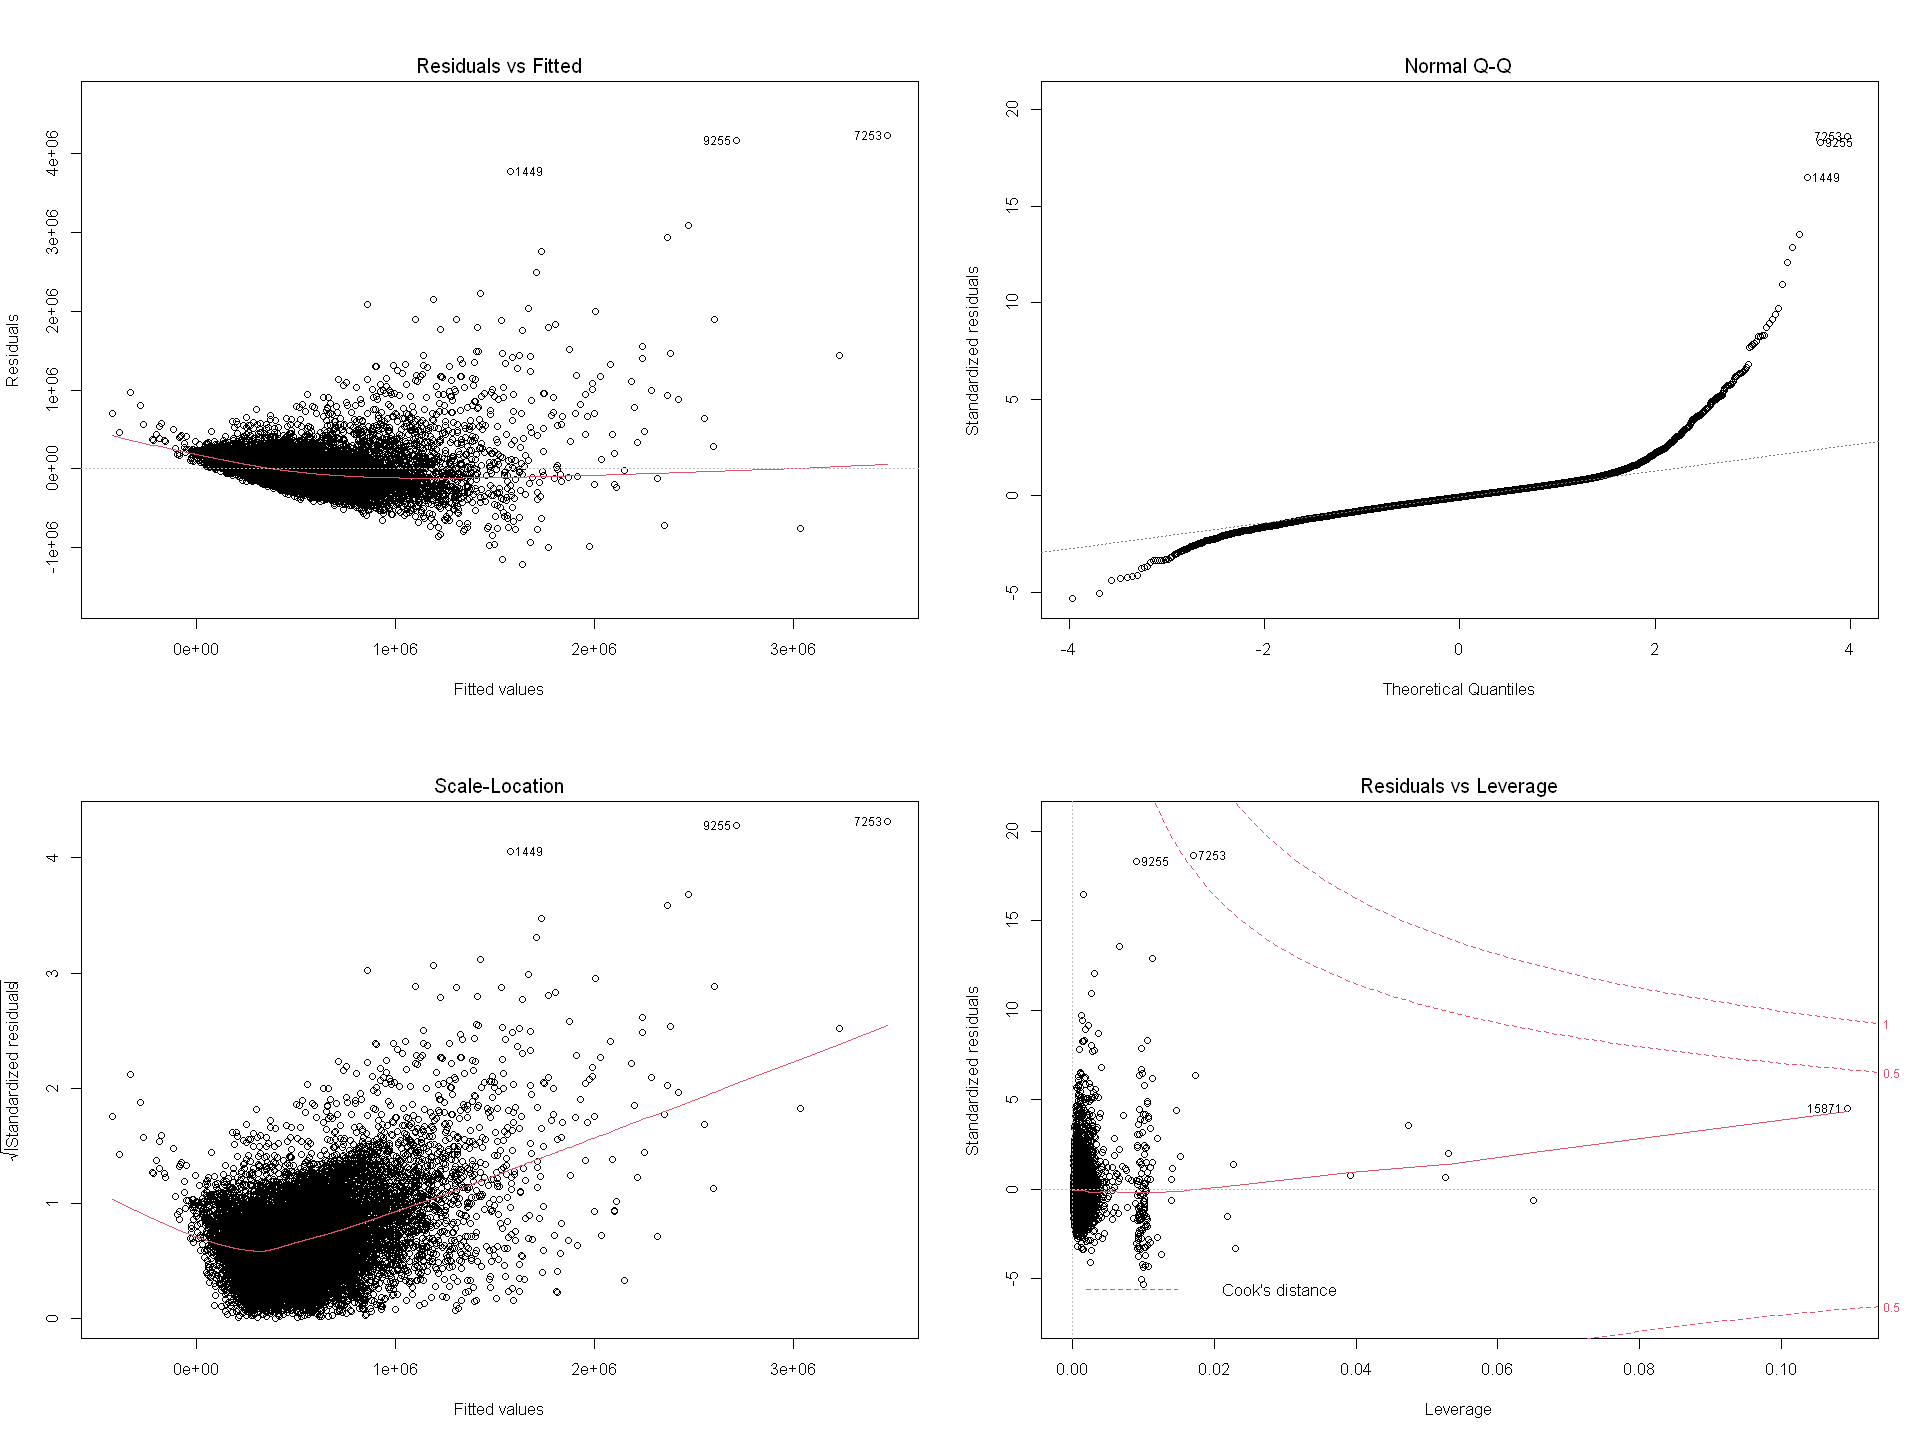

In [32]:
par(mfrow = c(2, 2))
plot(final_lm)

<ul style="list-style-type:disc">
<li><b>Residual vs Fitted Plot</b> shows scatted values around indicated the relationship between price and predictors is linear.</li><br><li><b> Normal Q-Q Plot</b> shows a straight line indicated the residuals are normally distributed.</li><br><li><b>Scale-Location Plot</b> verifies that there is no clear pattern among the residuals, however the red line is not roughly horizontal, therefore this model is not fully reliable.</li><br><li><b>Residuals vs Leverage Plot</b> shows there are no leverage out of the border of Cook’s distance (the red dashed lines), hence our regression model does not contain any influential points.</li>
</ul>


# EVALUATE PREDICTION MODEL

## Prediction test on Train Set 

In [33]:
# fitted values of train data
actual_fitted = data.frame(actual=train_df$price, predicted=final_lm$fitted.values)
abs_diff = mean(abs(actual_fitted$actual-actual_fitted$predicted)/actual_fitted$actual)
accuracy=1-abs_diff
cat("The accuracy of the model on train dataset: ",round(accuracy*100,2),"%")

The accuracy of the model on train dataset:  69.71 %

## Prediction test on Test Set 

In [34]:
pred_test=predict(final_lm,newdata=test_df)
SSE <- sum((test_df$price - pred_test) ^ 2)  #Sum of Squares Error
SST <- sum((test_df$price - mean(test_df$price)) ^ 2)  #Sum of Squares Total
cat("The accuracy of the model on test dataset: ",round((1 - SSE/SST)*100,2),"%")

The accuracy of the model on test dataset:  63.97 %

# IV. CONCLUSION

The provided Multiple Linear Regression model shows that <b>bedrooms, bathrooms, sqft_living, sqft_lot, floors
, waterfront, condition, grade</b> and <b>age </b>are significant factors that affecting the house price. The prediction model able to predict the house price in King Country by taking into account the 9 variables above at approximately 60-70% accuracy.<br>
However, this accuracy level is not ideal for a prediction model, probably because linear regression is a simple and not the best options for some datasets. We will try out advanced models in the next session and make comparisons between them. 